# Reto 1
Sofía Macias Pérez, Mariana ramirez gomez y Felipe Mendoza Navarrete.

## Pre-procesamiento de Datos:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

In [2]:
file_name = 'datasets/hotel_bookings.csv'
df = pd.read_csv(file_name)
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [3]:
df.shape

(119390, 32)

In [4]:
df.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

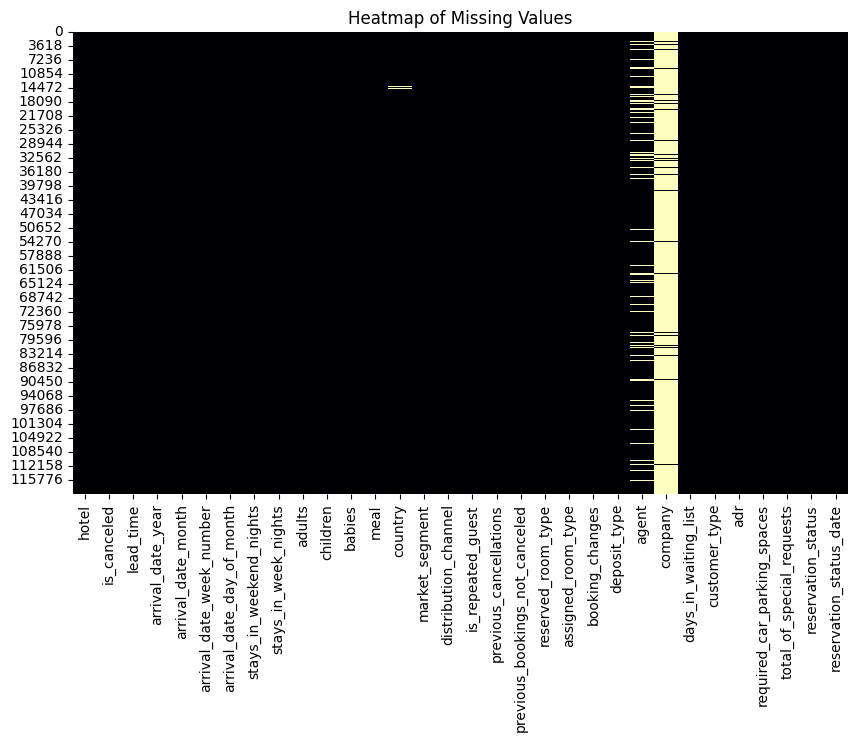

In [5]:
# Create a boolean mask where True indicates NaN values
null_mask = df.isnull()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(null_mask, cbar=False, cmap="magma")
plt.title("Heatmap of Missing Values")
plt.show()

In [6]:
# Calculate the number of missing values
missing_counts = df.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = df.isnull().mean() * 100

# Create a DataFrame to hold both counts and percentages
missing_summary = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage': missing_percentage
})

# Filter to show only columns with more than 1% missing values
missing_summary_filtered = missing_summary[missing_summary['Percentage'] > 0]

# Calculate totals
total_missing = missing_summary['Missing Values'].sum()
total_percentage = 0

# Add totals to the filtered summary
missing_summary_filtered.loc['Total'] = [total_missing,0]

# Print the summary table
print(missing_summary_filtered)


          Missing Values  Percentage
children               4    0.003350
country              488    0.408744
agent              16340   13.686238
company           112593   94.306893
Total             129425    0.000000


/var/folders/4l/3kt45bp907g_zjx6qwp8r7v00000gn/T/ipykernel_10663/3588148369.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_summary_filtered.loc['Total'] = [total_missing,0]


En el mapa de calor se puede evidenciar que las columnas agent y company estan relacionadas. Pues las filas que tienen un valor para agent no tienen un valor para company y viceversa. 

In [7]:
# Filter rows where agent has a value and company has no value
subset = df[(df['agent'].notnull()) & (df['company'].isnull())]
print(f"Number of rows where agent has a value and company has no value: {len(subset)}")

# Filter rows where agent has no value and company has a value
subset2 = df[(df['agent'].isnull()) & (df['company'].notnull())]
print(f"Number of rows where agent has no value and company has a value: {len(subset2)}")

# Filter rows where agent has value and company also has value
subset3 = df[(df['agent'].notnull()) & (df['company'].notnull())]
print(f"Number of rows where agent has value and company also has value: {len(subset3)}")

# Filter rows where agent has no value and company also has no value
subset4 = df[(df['agent'].isnull()) & (df['company'].isnull())]
print(f"Number of rows where agent has no value and company also has no value: {len(subset4)}")




Number of rows where agent has a value and company has no value: 102833
Number of rows where agent has no value and company has a value: 6580
Number of rows where agent has value and company also has value: 217
Number of rows where agent has no value and company also has no value: 9760


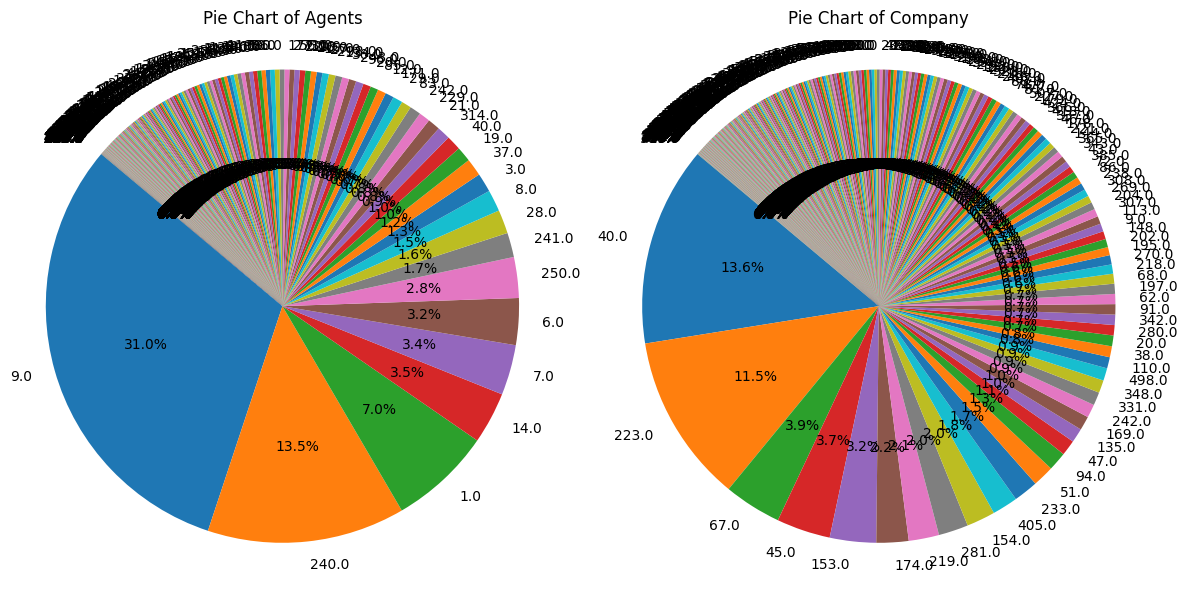

In [8]:
agent_counts = df['agent'].value_counts()

# Create a figure with a 1x2 grid for the pie charts
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First pie chart
axs[0].pie(agent_counts, labels=agent_counts.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Pie Chart of Agents')
axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# second pie chart
company_counts = df['company'].value_counts()  # Example for second chart
axs[1].pie(company_counts, labels=company_counts.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Pie Chart of Company')
axs[1].axis('equal')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [9]:


def create_custom_pie_chart(df, column, threshold=5, colormap='GnBu', title='Pie Chart',):

    # Calculate total occurrences
    counts = df[column].value_counts()
    total = counts.sum()

    # Calculate percentage for each country
    percentages = (counts / total) * 100

    # Identify countries with less than the specified threshold and sum their percentages
    small_labels = percentages[percentages < threshold]
    other_percentage = small_labels.sum()

    # Filter out the countries with >= the specified threshold and add the 'Others' category
    percentages = percentages[percentages >= threshold]
    percentages['Others'] = other_percentage

    # Create a color map from the specified colormap
    cmap = plt.get_cmap(colormap)
    colors = cmap(np.linspace(0.2, 0.8, len(percentages)))

    # Create the pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(percentages,
            labels=percentages.index,
            autopct='%1.1f%%',
            startangle=140,
            colors=colors,
            shadow=True,
            wedgeprops={'edgecolor': 'black'})

    plt.title(title, fontsize=16, fontweight='bold')
    plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
    plt.tight_layout()
    plt.show()



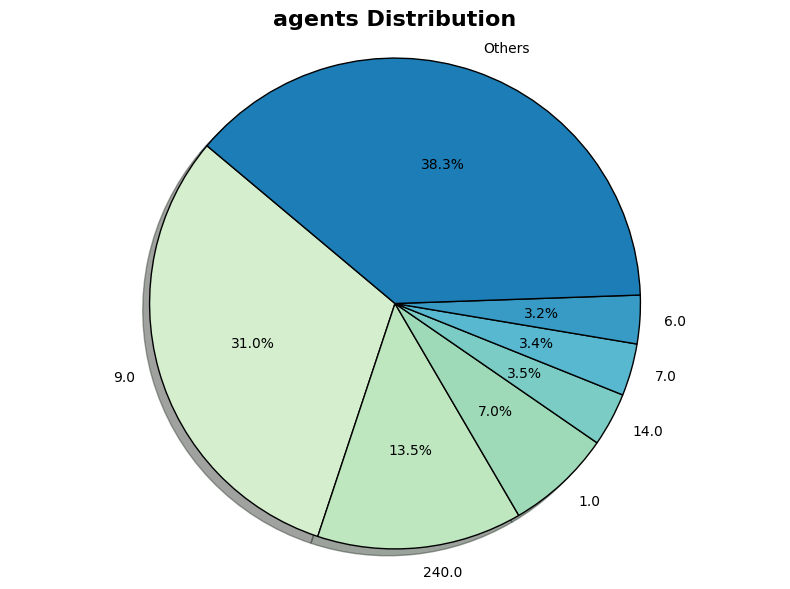

In [10]:
create_custom_pie_chart(df, column='agent', threshold=3, colormap='GnBu', title='agents Distribution')


## Imputación de Datos Faltantes

In [11]:
df = df.drop('company', axis=1)

In [12]:
missing_numeric = ['children']
missing_categorical = ['country',"agent"]

# Step 2: Impute median for numeric columns
median_imputer = SimpleImputer(strategy='median')
df[missing_numeric] = median_imputer.fit_transform(df[missing_numeric])

In [13]:
# Step 3: Impute mode for categorical columns
mode_imputer = SimpleImputer(strategy='most_frequent')
df[missing_categorical] = mode_imputer.fit_transform(df[missing_categorical])

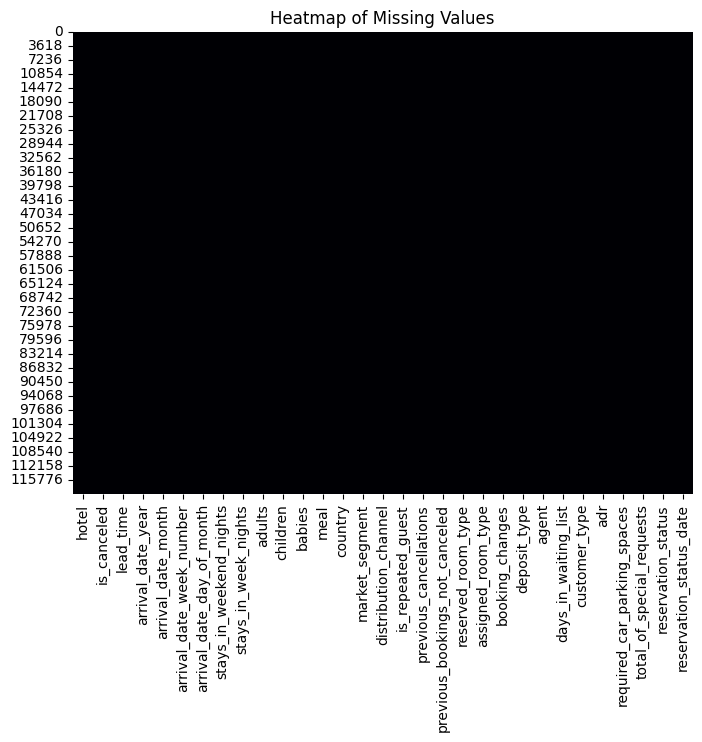

In [14]:
# Create a boolean mask where True indicates NaN values
null_mask = df.isnull()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(null_mask, cbar=False, cmap="magma")
plt.title("Heatmap of Missing Values")
plt.show()

### Identificar Atípicos:

#### Box Plots:

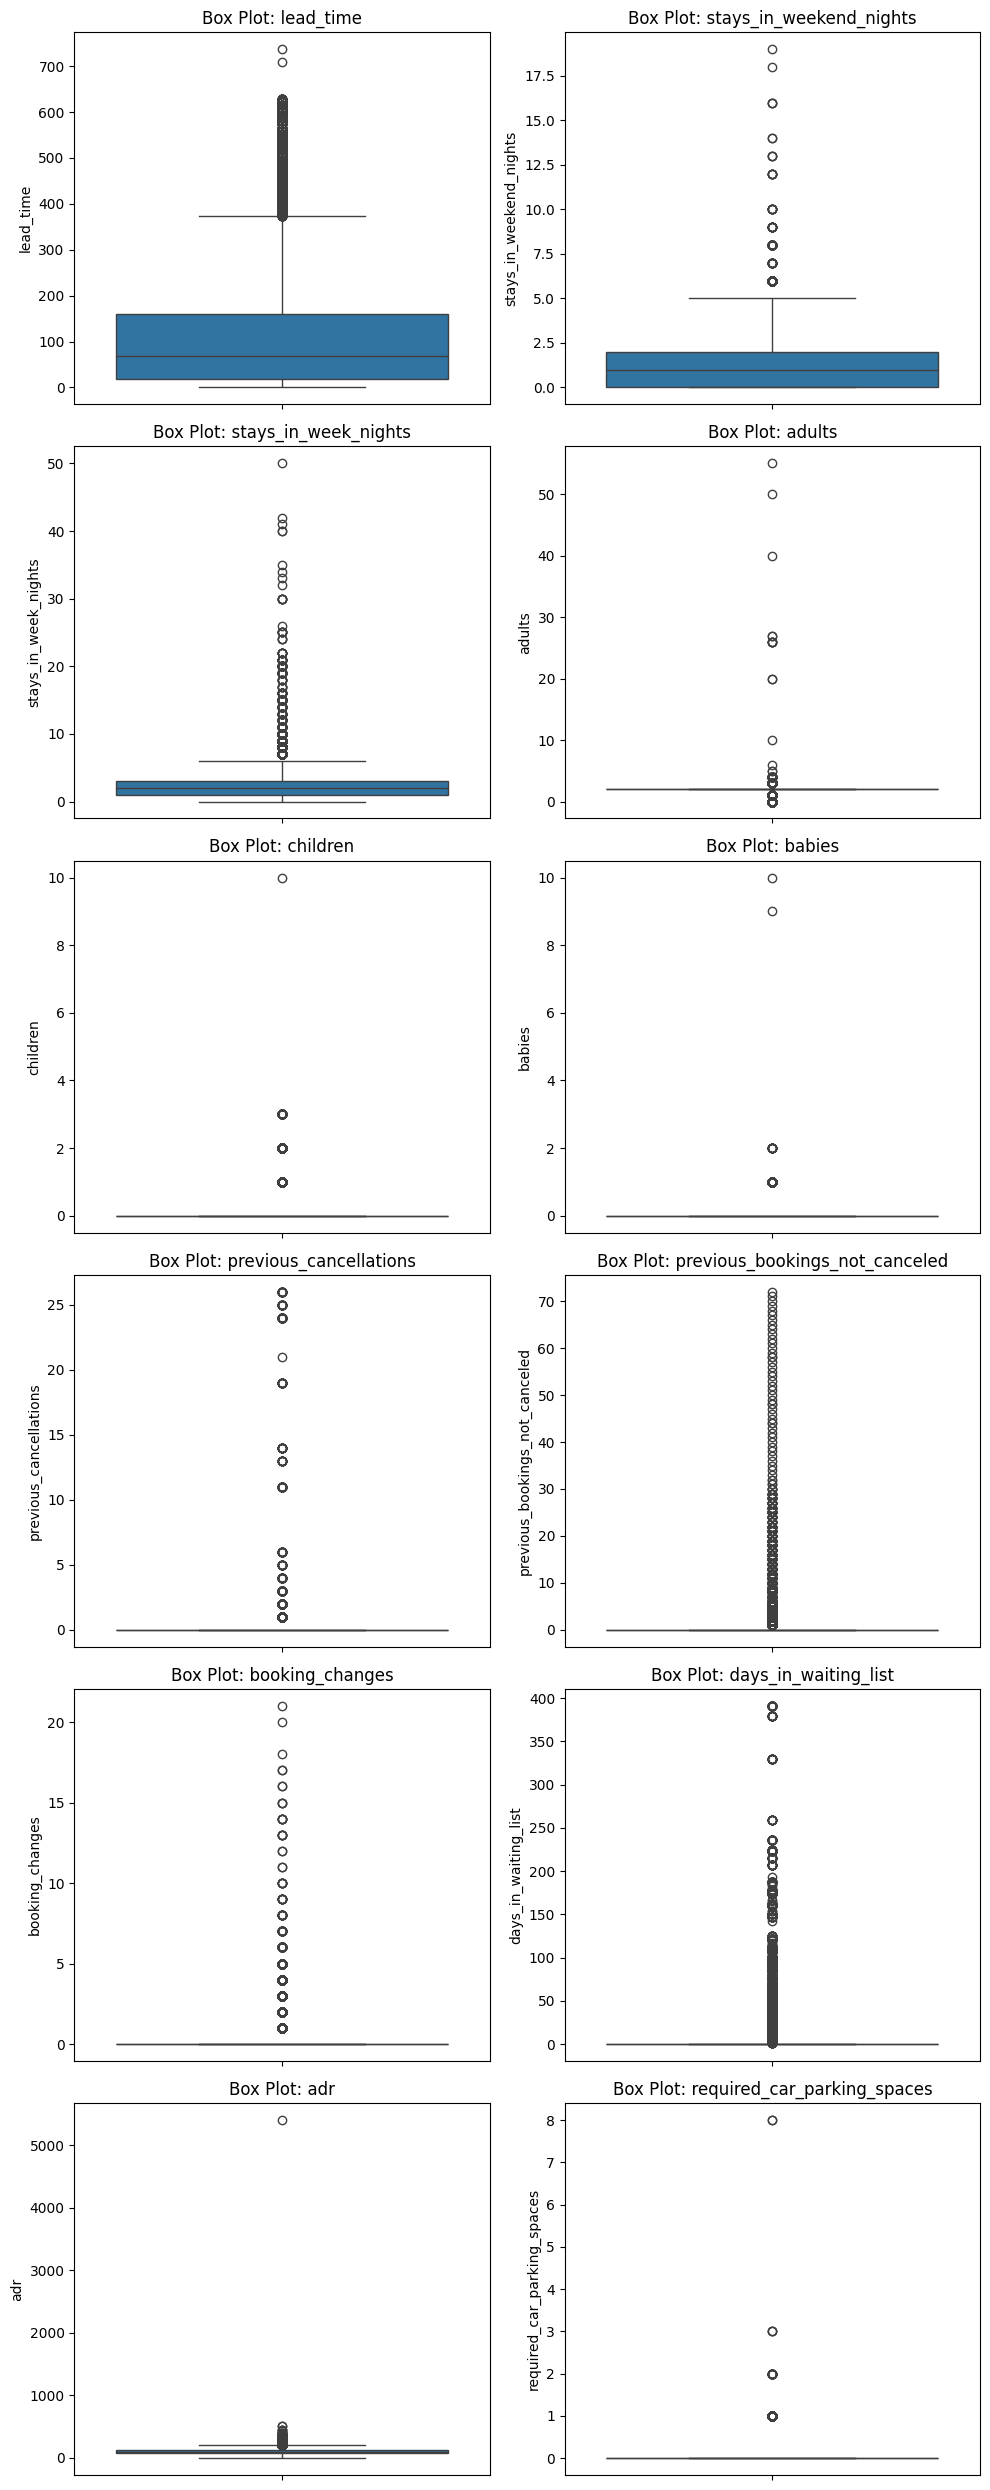

In [15]:

# Columns for box plot
col_boxPlot = ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces']

# Create subplots - 2 rows, 5 columns for example (5 plots per row)
fig, axes = plt.subplots(6, 2, figsize=(10, 25))  # Adjust the layout as needed
axes = axes.flatten()  # Flatten the axes array to iterate over easily

# Create individual box plots for each column
for i, col in enumerate(col_boxPlot):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot: {col}')

# Adjust layout
plt.tight_layout()
plt.show()

### Codificación de Variables Categóricas:

country

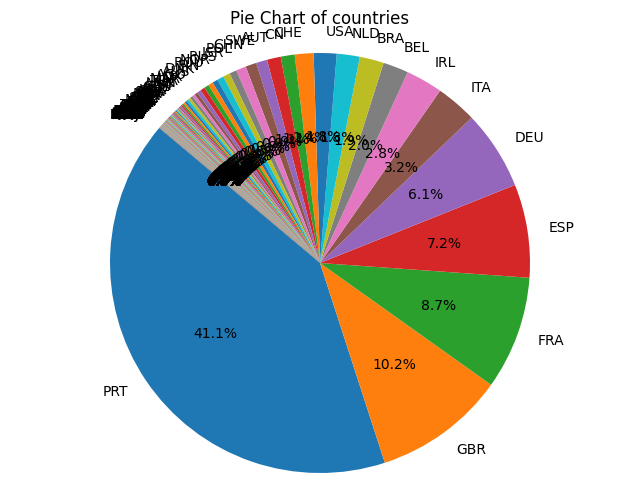

In [16]:
# Pie chart for countries
# Count occurrences of each category
country_counts = df['country'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of countries')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

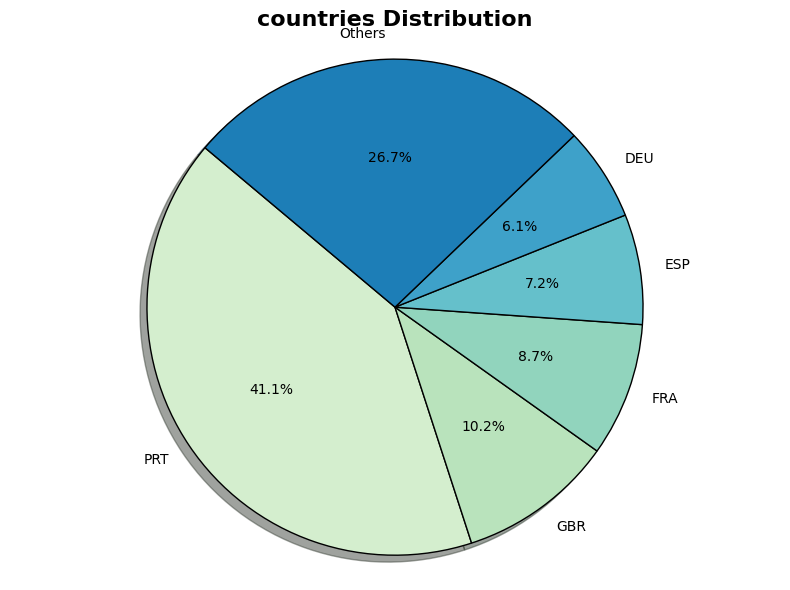

In [17]:
create_custom_pie_chart(df, column='country', threshold=5, colormap='GnBu', title='countries Distribution')


In [18]:
# Paso 1: Crear una nueva columna
df['Country_Group'] = df['country']

# Calculate total occurrences
counts = df["country"].value_counts()
total = counts.sum()

# Calculate percentage for each country
percentages = (counts / total) * 100
# Paso 2: Identificar los países a agrupar como "Others"
small_countries = percentages[percentages < 5].index

# Paso 3: Actualizar los valores en la columna "Country_Group"
df.loc[df['country'].isin(small_countries), 'Country_Group'] = 'Others'

# Paso 4: Verificar el DataFrame actualizado
print(df[['country', 'Country_Group']].head(16))  # Muestra los primeros registros


   country Country_Group
0      PRT           PRT
1      PRT           PRT
2      GBR           GBR
3      GBR           GBR
4      GBR           GBR
5      GBR           GBR
6      PRT           PRT
7      PRT           PRT
8      PRT           PRT
9      PRT           PRT
10     PRT           PRT
11     PRT           PRT
12     USA        Others
13     ESP           ESP
14     PRT           PRT
15     IRL        Others


In [19]:
df['Country_Group'].unique()

array(['PRT', 'GBR', 'Others', 'ESP', 'FRA', 'DEU'], dtype=object)

In [20]:
df['Country_Group'].describe()

count     119390
unique         6
top          PRT
freq       49078
Name: Country_Group, dtype: object

agent

In [21]:
# Paso 1: Crear una nueva columna
df['agent_Group'] = df['agent']

# Calculate total occurrences
counts = df["agent"].value_counts()
total = counts.sum()

# Calculate percentage for each country
percentages = (counts / total) * 100
# Paso 2: Identificar los países a agrupar como "Others"
small_countries = percentages[percentages < 3].index

# Paso 3: Actualizar los valores en la columna "Country_Group"
df.loc[df['agent'].isin(small_countries), 'agent_Group'] = 'Others'

# Paso 4: Verificar el DataFrame actualizado
print(df[['agent', 'agent_Group']].head(16))  # Muestra los primeros registros

    agent agent_Group
0     9.0         9.0
1     9.0         9.0
2     9.0         9.0
3   304.0      Others
4   240.0       240.0
5   240.0       240.0
6     9.0         9.0
7   303.0      Others
8   240.0       240.0
9    15.0      Others
10  240.0       240.0
11  240.0       240.0
12  240.0       240.0
13  241.0      Others
14  241.0      Others
15  240.0       240.0


In [22]:
df['agent_Group'].describe()

count     119390.0
unique         5.0
top            9.0
freq       48301.0
Name: agent_Group, dtype: float64

one hot

In [23]:
# List of columns to one-hot encode 
# (Dejamos country afuera )
col_encode_oneHot = ['hotel', 'meal','market_segment','distribution_channel','deposit_type','customer_type','reservation_status','Country_Group','agent_Group']
df_oneHot_encoded = pd.get_dummies(df, columns=col_encode_oneHot, dtype=int)


# Ordinal encode
# (Dejamos reserved_room_type, assigned_room_type afuera mientras miramos si se pueden fusionar)
# for arrival_date_month
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 
    'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 
    'November': 11, 'December': 12
}
df_oneHot_encoded['arrival_date_month'] = df_oneHot_encoded['arrival_date_month'].map(month_mapping)
df_encoded = df_oneHot_encoded
df_encoded.head()

is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0            0        342               2015                   7   
1            0        737               2015                   7   
2            0          7               2015                   7   
3            0         13               2015                   7   
4            0         14               2015                   7   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                        0                     0       2       0.0  ...   
1                        0                     0       2       0.0  ...   
2                        0                     1       1       0.0  ...   
3                        0                     1       1       0.0  ...   
4                        0                     2       2       0.0  ...   

   Country_Group_ESP Country_Group_FRA  Country_Group_GBR  \
0                  0                 0                  0   
1                  0                 0                  0   
2                  0                 0                  1   
3                  0                 0                  1   
4                  0                 0                  1   

   Country_Group_Others  Country_Group_PRT agent_Group_1.0 agent_Group_9.0  \
0                     0                  1               0               1   
1                     0                  1               0               1   
2                     0                  0               0               1   
3                     0                  0               0               0   
4                     0                  0               0               0   

   agent_Group_14.0 agent_Group_240.0  agent_Group_Others  
0                 0                 0                   0  
1                 0                 0                   0  
2                 0                 0                   0  
3                 0                 0                   1  
4                 0                 1                   0  

[5 rows x 65 columns]

room types

In [24]:
# Step 1: Compare the two columns
diff_values = df['reserved_room_type'] != df['assigned_room_type']

# Step 2: Get rows where the values are different
equal_rows = df[diff_values]

# Step 3: Show the result
len(equal_rows)


14917

In [25]:
df_encoded['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [26]:
df_encoded['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

label encoding

In [27]:

def ordered_label_encode(df, column, order):
    # Create a mapping dictionary based on the specified order
    mapping = {category: idx for idx, category in enumerate(order)}
    
    # Replace the original column values with the mapped integers
    df[column] = df[column].map(mapping)
    
    return df, mapping


desired_order = ['A', 'B', 'C','D','E','F','G','H','I','K','L','P']

# Apply ordered label encoding
df_encoded, mapping = ordered_label_encode(df_encoded, 'assigned_room_type', desired_order)
df_encoded, mapping = ordered_label_encode(df_encoded, 'reserved_room_type', desired_order)




print("Mapping:", mapping)


Mapping: {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'K': 9, 'L': 10, 'P': 11}


### Normalización de Rango:

In [28]:
from sklearn.preprocessing import MinMaxScaler

# Columns you want to normalize
columns_to_normalize = ['lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes','days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests','assigned_room_type','reserved_room_type',
       'arrival_date_week_number', 'arrival_date_month', 'arrival_date_day_of_month', 'arrival_date_year'
        ]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Create a new DataFrame to hold the normalized values
normalized_df = df_encoded.copy()
normalized_df[columns_to_normalize] = scaler.fit_transform(normalized_df[columns_to_normalize])

# Display the new DataFrame
print(normalized_df)

        is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0                 0   0.464043                0.0            0.545455   
1                 0   1.000000                0.0            0.545455   
2                 0   0.009498                0.0            0.545455   
3                 0   0.017639                0.0            0.545455   
4                 0   0.018996                0.0            0.545455   
...             ...        ...                ...                 ...   
119385            0   0.031208                1.0            0.636364   
119386            0   0.138399                1.0            0.636364   
119387            0   0.046133                1.0            0.636364   
119388            0   0.147897                1.0            0.636364   
119389            0   0.278155                1.0            0.636364   

        arrival_date_week_number  arrival_date_day_of_month  \
0                       0.500000                   0.000000 

## Procesamiento de Datos:

### Covarianza:

In [29]:
# Mientras preguntamos por esos datos
df_temporal = normalized_df.drop(columns=['country','reservation_status_date','agent'])
cov_matrix = df_temporal.cov()
print(cov_matrix)

                          is_canceled  lead_time  arrival_date_year  \
is_canceled                  0.233210   0.020525           0.002846   
lead_time                    0.020525   0.021024           0.002059   
arrival_date_year            0.002846   0.002059           0.125131   
arrival_date_month           0.001495   0.005354          -0.052451   
arrival_date_week_number     0.001030   0.004813          -0.050030   
...                               ...        ...                ...   
agent_Group_1.0              0.021914   0.011435          -0.020952   
agent_Group_9.0             -0.005004  -0.015553           0.024962   
agent_Group_14.0            -0.005832  -0.001421           0.003024   
agent_Group_240.0            0.002739  -0.003055           0.000588   
agent_Group_Others          -0.013817   0.008594          -0.007623   

                          arrival_date_month  arrival_date_week_number  \
is_canceled                         0.001495                  0.001030   

### Correlación:

In [30]:
# Esperando lo mismo que covarianza
correlation_matrix = df_temporal.corr()
print(correlation_matrix)

                          is_canceled  lead_time  arrival_date_year  \
is_canceled                  1.000000   0.293123           0.016660   
lead_time                    0.293123   1.000000           0.040142   
arrival_date_year            0.016660   0.040142           1.000000   
arrival_date_month           0.011022   0.131424          -0.527739   
arrival_date_week_number     0.008148   0.126871          -0.540561   
...                               ...        ...                ...   
agent_Group_1.0              0.190736   0.331477          -0.248950   
agent_Group_9.0             -0.021114  -0.218545           0.143773   
agent_Group_14.0            -0.070246  -0.056991           0.049728   
agent_Group_240.0            0.017675  -0.065650           0.005181   
agent_Group_Others          -0.058712   0.121624          -0.044218   

                          arrival_date_month  arrival_date_week_number  \
is_canceled                         0.011022                  0.008148   

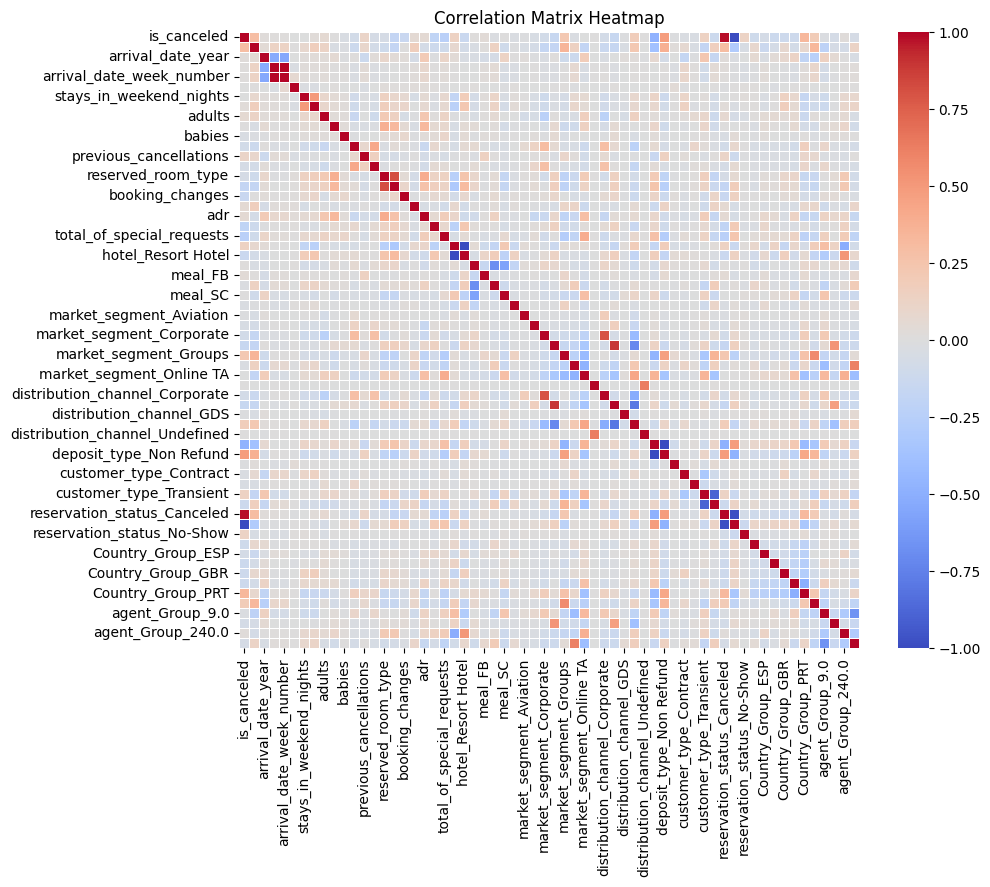

In [31]:
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)

# Add a title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

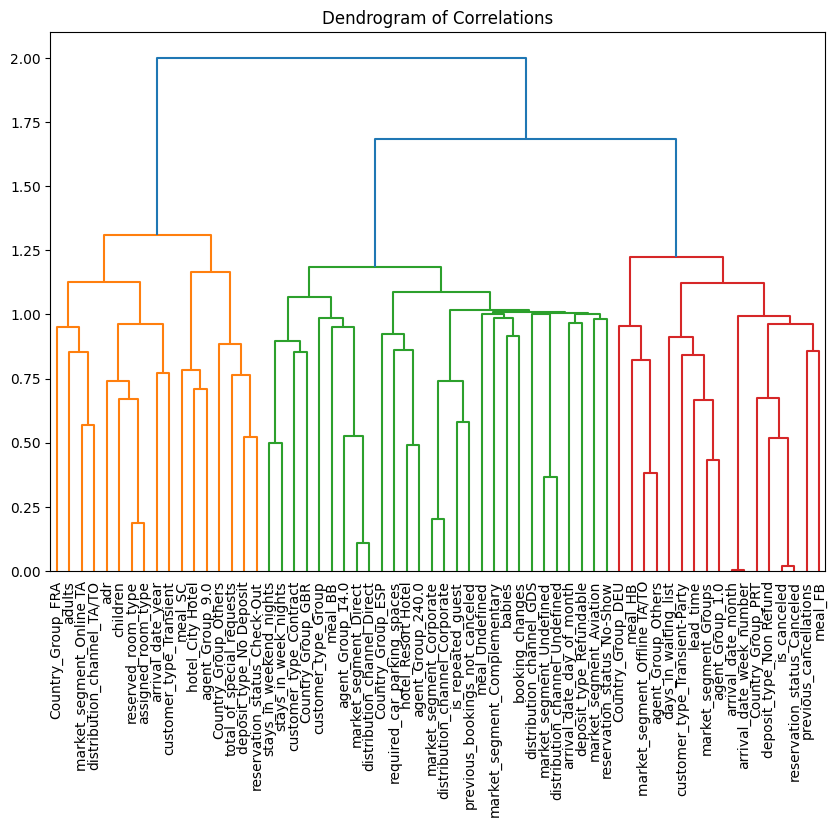

In [32]:
distance_matrix = 1 - correlation_matrix

# Perform hierarchical clustering using linkage
# Use 'complete' linkage method, but you can choose other methods like 'average' or 'single'
Z = linkage(squareform(distance_matrix), method='complete')

# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=correlation_matrix.columns, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram of Correlations')
plt.show()

In [33]:
# Assuming your DataFrame is 'df_encoded'

# Step 1: Find all non-numeric columns
non_numeric_columns = normalized_df.select_dtypes(exclude=['number']).columns

# Display the non-numeric columns
print("Non-numeric columns:")
print(non_numeric_columns)


Non-numeric columns:
Index(['country', 'agent', 'reservation_status_date'], dtype='object')


Analizar si afecta en satisfacción del cliente (repeated guest)

## PCA

inicialmente se realiza el pca solo con las columnas numericas (resultantes de la codificación)

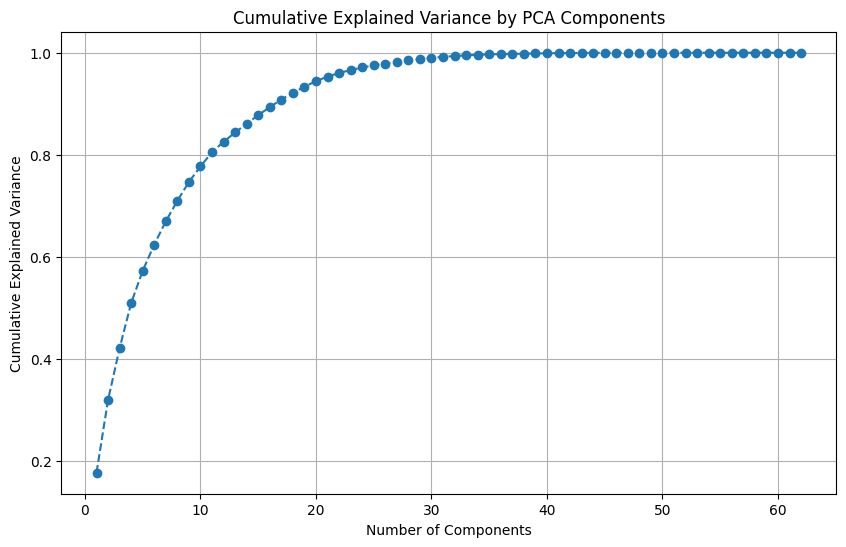

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Filter only numeric columns
normalized_df = normalized_df.select_dtypes(include=['number'])

# Step 2: Initialize PCA (you can define n_components or use the default which considers all components)
pca = PCA()

# Step 3: Fit PCA on the numeric columns and transform the data
pca_result = pca.fit_transform(normalized_df)


# Step 4: Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Step 5: Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()



In [35]:
# Step 3: Calculate the cumulative variance for the first 2 principal components
cumulative_variance_2_components = explained_variance[:2].sum()

# Step 4: Display the cumulative variance for the first 2 components
print(f"Cumulative explained variance for the first 2 principal components: {cumulative_variance_2_components:.4f}")

Cumulative explained variance for the first 2 principal components: 0.3196



Most important variables for Principal Component 1:
is_canceled                     0.457265
reservation_status_Check-Out    0.457265
reservation_status_Canceled     0.452616
Country_Group_PRT               0.293095
deposit_type_Non Refund         0.251896
deposit_type_No Deposit         0.251695
market_segment_Groups           0.170461
market_segment_Online TA        0.148273
Country_Group_Others            0.138150
hotel_City Hotel                0.119456
Name: PC1, dtype: float64

Most important variables for Principal Component 2:
market_segment_Online TA         0.434107
agent_Group_9.0                  0.388792
agent_Group_Others               0.380422
customer_type_Transient          0.257498
market_segment_Offline TA/TO     0.252180
hotel_City Hotel                 0.233222
hotel_Resort Hotel               0.233222
customer_type_Transient-Party    0.231820
Country_Group_PRT                0.192218
Country_Group_Others             0.179396
Name: PC2, dtype: float64

Explained v

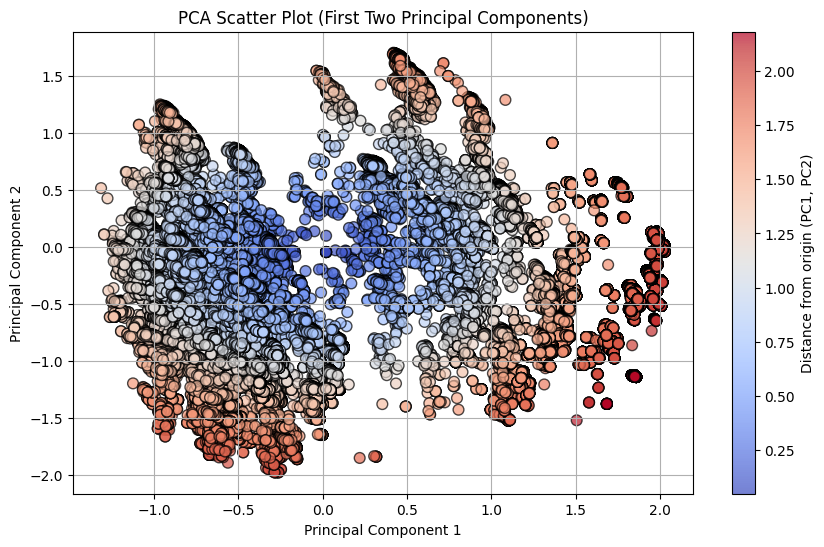

In [36]:

# Step 1: Filter only numeric columns
normalized_df = normalized_df.select_dtypes(include=['number'])

# Step 2: Initialize PCA with two components for 2D visualization
pca = PCA(n_components=2)

# Step 3: Fit PCA on the numeric columns and transform the data
pca_result = pca.fit_transform(normalized_df)

loadings = pca.components_.T  # Transpose to get variables in rows

loadings_df = pd.DataFrame(loadings, index=normalized_df.columns, columns=['PC1', 'PC2'])

# Step 5: Analyze the loadings for PC1 and PC2
for i in range(2):
    print(f"\nMost important variables for Principal Component {i+1}:")
    # Sort loadings by absolute value to find the most important variables
    sorted_loadings = loadings_df.iloc[:, i].abs().sort_values(ascending=False)
    print(sorted_loadings.head(10))  # Display top 10 variables

# Step 6: Explained variance ratio
print("\nExplained variance ratio for PC1 and PC2:")
print(pca.explained_variance_ratio_)

# Step 4: Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Step 5: Normalize the PCA components for better color scaling
norm = np.sqrt(pca_df['PC1']**2 + pca_df['PC2']**2)

# Step 6: Plot the PCA result for the first two principal components with enhanced colors
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=norm, cmap='coolwarm', s=60, edgecolor='k', alpha=0.7)
plt.title('PCA Scatter Plot (First Two Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

# Add a color bar for reference
cbar = plt.colorbar(scatter)
cbar.set_label('Distance from origin (PC1, PC2)')

plt.show()


Los primeros dos componentes principales explican en el 87% de la varianza

# Clustering

Las métricas usadas para validar los clusters son:
- Silhouette Score
- Davies-Bouldin Score
- Calinski-Harabasz

In [37]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [38]:
columnas = ["Algoritmo", "Parametros", "Silhouette", "Davies-Bouldin", "Calinski-Harabasz","# clusters"]
resultados = pd.DataFrame(columns=columnas)

## K-means

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


In [40]:


k_values = [2, 3, 4, 5]
resultados = pd.DataFrame()

# Dictionary to store the cluster results
cluster_results = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(normalized_df)

    # Save cluster assignments for each value of k
    cluster_results[k] = clusters

    # Calculate metrics
    silhouette_avg = silhouette_score(normalized_df, clusters)
    db_index = davies_bouldin_score(normalized_df, clusters)
    calinski_s = calinski_harabasz_score(normalized_df, clusters)

    # Save results in the DataFrame
    new_row = pd.DataFrame({
        "Algoritmo": ["KMeans"],
        "Parametros": [f"k={k}"],
        "Silhouette": [silhouette_avg],
        "Davies-Bouldin": [db_index],
        "Calinski-Harabasz": [calinski_s],
        "# clusters": k
    })

    resultados = pd.concat([resultados, new_row], ignore_index=True)

# Now 'cluster_results' holds the cluster assignments for each k value


In [41]:
resultados

Algoritmo Parametros  Silhouette  Davies-Bouldin  Calinski-Harabasz  \
0    KMeans        k=2    0.137454        2.604454       16430.164506   
1    KMeans        k=3    0.143160        2.368629       17541.462589   
2    KMeans        k=4    0.167267        1.999485       16363.774410   
3    KMeans        k=5    0.163742        2.033383       14507.584641   

   # clusters  
0           2  
1           3  
2           4  
3           5

## DBSCAN 
Para obtener el valor óptimo de *ε* que permita tener la mejor partición del conjunto de datos se usara la gráfica de codo, esta gráfica calcula las distancias de cada punto a su vecino más cercano y traza una gráfica de la distancia del punto al vecimo k-ésimo más cercano. 

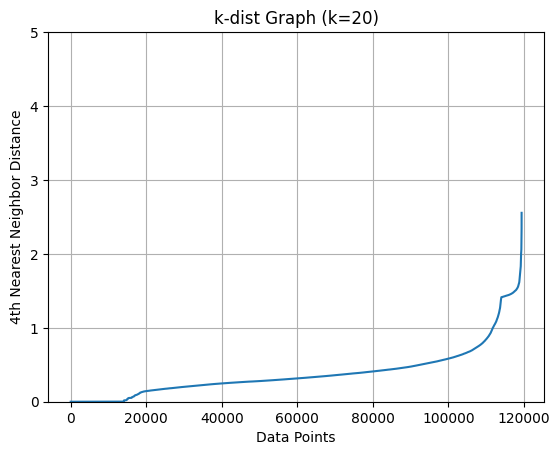

In [42]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(normalized_df)
distances, indices = neighbors_fit.kneighbors(normalized_df)

distances = np.sort(distances[:, 19], axis=0)
plt.plot(distances)
plt.title('k-dist Graph (k=20)')
plt.xlabel('Data Points')
plt.ylabel('4th Nearest Neighbor Distance')
plt.ylim(0,5)
plt.grid(True)
plt.show()


El valor de eps corresponde al punto en el que la curva tiene un cambio más drástico, el cuál está indicado por el codo. Esta curvatura indica que la mayoría de los puntos tienen una distancia al 20th vecino más cercano de entre 0 y 2, a partir de un punto cercano a los 100000 datos la distancia empieza a subir rápidamente.

A partir de la gráfica se determina que un buen valor para eps esta entre $2$ y $3$.

En cuanto a los min_points se uso la regla empírica min_points = 2 * n, donde n es la cantidad de dimensiones

In [43]:
from sklearn.cluster import DBSCAN

eps_values= [1.5, 1.6,1.7]
min_points = 64

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_points)
    clusters = dbscan.fit_predict(normalized_df)

    # Clusters sin noise points
    num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    
    if num_clusters > 1: 
        silhouette_avg = silhouette_score(normalized_df, clusters)
        db_index = davies_bouldin_score(normalized_df, clusters)
        calinski_s = calinski_harabasz_score(normalized_df, clusters)

    # Save results in the DataFrame
        new_row = pd.DataFrame({
            "Algoritmo": ["DBSCAN"],
            "Parametros": [f"eps={eps},min_points={min_points}"],
            "Silhouette": [silhouette_avg],
            "Davies-Bouldin": [db_index],
            "Calinski-Harabasz": [calinski_s],
            "# clusters": num_clusters
        })
    
        #resultados = pd.concat([resultados, new_row], ignore_index=True)
    else: 
        print(f"Para eps={eps} y min_points={min_points}, no es posible calcular Silhouette o Davies-Bouldin (clusters insuficientes).")

In [44]:
resultados

Algoritmo Parametros  Silhouette  Davies-Bouldin  Calinski-Harabasz  \
0    KMeans        k=2    0.137454        2.604454       16430.164506   
1    KMeans        k=3    0.143160        2.368629       17541.462589   
2    KMeans        k=4    0.167267        1.999485       16363.774410   
3    KMeans        k=5    0.163742        2.033383       14507.584641   

   # clusters  
0           2  
1           3  
2           4  
3           5

## Hierarchical clustering

In [45]:
muestra = normalized_df.sample(frac=0.10,random_state=42)

In [46]:
from sklearn.cluster import AgglomerativeClustering

Hcluster_results = {}
k_values = [2,3,4,5]
for k in k_values:
    hierarchical = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    clusters = hierarchical.fit_predict(muestra)

    # Save cluster assignments for each value of k
    Hcluster_results[k] = clusters

    #Metricas
    silhouette_avg = silhouette_score(muestra, clusters)
    db_index = davies_bouldin_score(muestra, clusters)
    calinski_s = calinski_harabasz_score(muestra, clusters)

    # Save results in the DataFrame
    new_row = pd.DataFrame({
        "Algoritmo": ["Hierarchical"],
        "Parametros": [f"k={k}"],
        "Silhouette": [silhouette_avg],
        "Davies-Bouldin": [db_index],
        "Calinski-Harabasz": [calinski_s],
        "# clusters": k
    })
    resultados = pd.concat([resultados, new_row], ignore_index=True)

In [47]:
resultados

Algoritmo Parametros  Silhouette  Davies-Bouldin  Calinski-Harabasz  \
0        KMeans        k=2    0.137454        2.604454       16430.164506   
1        KMeans        k=3    0.143160        2.368629       17541.462589   
2        KMeans        k=4    0.167267        1.999485       16363.774410   
3        KMeans        k=5    0.163742        2.033383       14507.584641   
4  Hierarchical        k=2    0.158099        1.869704        1767.423225   
5  Hierarchical        k=3    0.137454        2.149090        1739.620074   
6  Hierarchical        k=4    0.160036        2.014020        1661.082907   
7  Hierarchical        k=5    0.189419        1.913136        1658.456209   

   # clusters  
0           2  
1           3  
2           4  
3           5  
4           2  
5           3  
6           4  
7           5

In [48]:
# Crear ranking por cada métrica
resultados['Rank S'] = resultados['Silhouette'].rank(ascending=False)  # Mayor es mejor
resultados['Rank DB'] = resultados['Davies-Bouldin'].rank(ascending=True)  # Menor es mejor
resultados['Rank CH'] = resultados['Calinski-Harabasz'].rank(ascending=False)  # Mayor es mejor

# Agregar la columna con el promedio de los rankings
resultados['Rank Prom'] = resultados[['Rank S', 'Rank DB', 'Rank CH']].mean(axis=1)

resultados_ordenados = resultados.sort_values(by='Rank Prom')

# Mostrar el DataFrame con los rankings
print(resultados_ordenados.round(2))

      Algoritmo Parametros  Silhouette  Davies-Bouldin  Calinski-Harabasz  \
2        KMeans        k=4        0.17            2.00           16363.77   
4  Hierarchical        k=2        0.16            1.87            1767.42   
7  Hierarchical        k=5        0.19            1.91            1658.46   
3        KMeans        k=5        0.16            2.03           14507.58   
1        KMeans        k=3        0.14            2.37           17541.46   
6  Hierarchical        k=4        0.16            2.01            1661.08   
0        KMeans        k=2        0.14            2.60           16430.16   
5  Hierarchical        k=3        0.14            2.15            1739.62   

   # clusters  Rank S  Rank DB  Rank CH  Rank Prom  
2           4     2.0      3.0      3.0       2.67  
4           2     5.0      1.0      5.0       3.67  
7           5     1.0      2.0      8.0       3.67  
3           5     3.0      5.0      4.0       4.00  
1           3     6.0      7.0      1.0  

## Validación de clustering

### Calinski-Harabasz Index
Este índice mide la relación entre la dispersión dentro de los clusters y la dispersión entre clusters. Los valores altos indican que los clusters están compactos y bien definidos.

Los mejores valores para este índice son:
1. Hierarchical (k=2) con 6925.10
2. Hierarchical (k=3) con 6903.81
3. Hierarchical (k=4) con 6537.08

### Silhoette Score
Este puntaje evalua que tan similar es un punto a los demás en su cluster comparado con otros clusters. Los valores cercanos a 1 indican que los puntos están bien agrupados dentro de sus clusters.

Los mejores valores para esta métrica son:
1. Hierarchical (k=5) con 0.1859
2. KMeans (k=4) con 0.1672
3. DBSCAN (eps= 1.7, min_points=64)

### Davies-Bouldin
Esta métrica se basa en la medida de las razones entre la distancia intra-cluster y la inter-cluster, es decir, que tan similar es un cluster a su cluster más cercano. Un valor bajo indica que los clusters son compactos.

Los mejores valores para este índice son:
1. Hierarchical (k=2) con 1.9076
2. Hierarchical (k=5) con 1.9043
3. KMeans (k=4) con 1.9994

Según esta métrica, los clusters generados por el algoritmo Hierarchical generan clusters compactos y diferentes entre sí.

El objetivo del reto es conseguir clusters compactos entre si (una distancia inter-cluster baja) y con una separación notoria (una distancia intra-cluster alta), es por eso que se le dará prioridad al Silhoette score, pues ofrece una manera directa de para conocer la concentración de los puntos de un cluster en comparación con los de otros clusters. 

Teniendo esto en cuenta, el clustering que se adapta mejor a los objetivos del reto es el 11, Hierarchical con 5 clusters. Este clustering presenta el mejor valor en el Silhouette Score y tiene un buen balance entre la métrica Davies-Bouldin y Calinski-Harabasz.

Con el fin de verificar la elección de la k, se realizó el siguiente gráfico con el algoritmo de Hierarchical clustering. Con el fin de visualizar el comportamiento de los clusters, se realizó un PCA, si bien no es conveniente para la interpretación, es conveniente para la visualización de los datos.

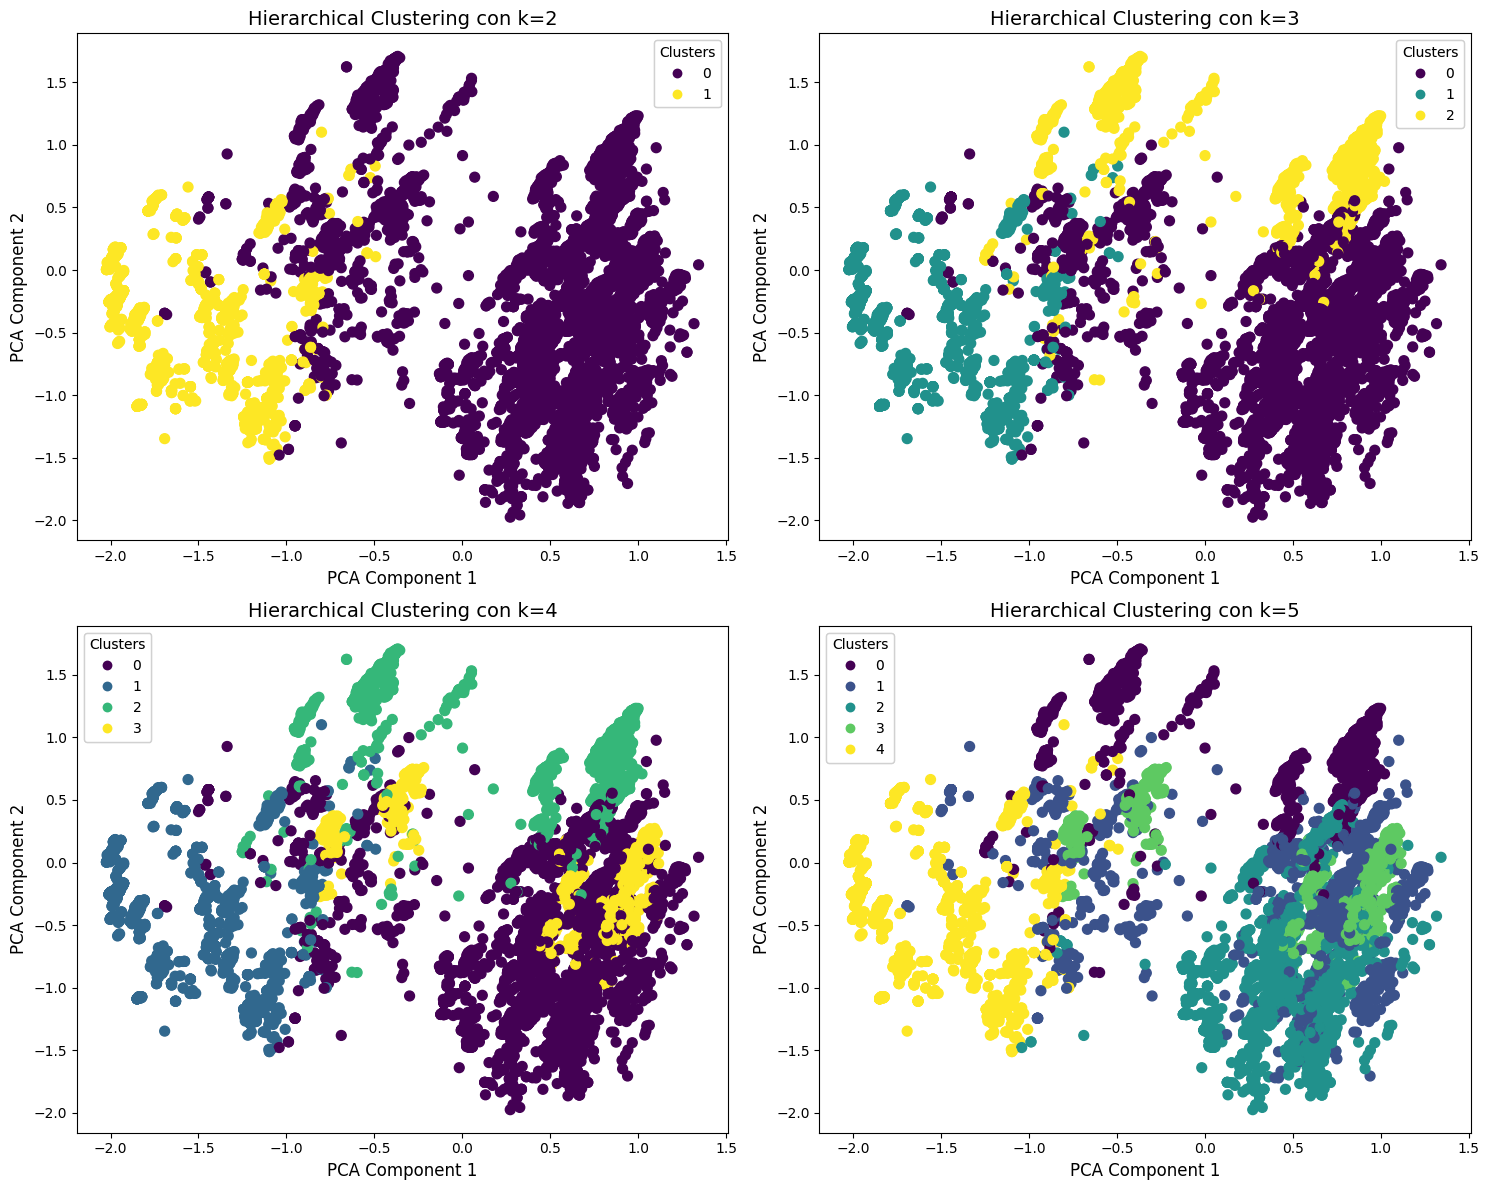

In [49]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(muestra)

fig, ax = plt.subplots(2, 2, figsize=(15, 12))
ax = ax.flatten()

for i, k in enumerate(k_values):
    clusters = Hcluster_results[k]
    scatter = ax[i].scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', s=50)

    ax[i].set_title(f'Hierarchical Clustering con k={k}', fontsize=14)
    ax[i].set_xlabel('PCA Component 1', fontsize=12)
    ax[i].set_ylabel('PCA Component 2', fontsize=12)

    legend = ax[i].legend(*scatter.legend_elements(), title="Clusters")
    ax[i].add_artist(legend)

plt.tight_layout()
plt.show()

El clustering k=5 proporciona la mejor segmentación visual en comparación con otros valores de k. Los clusters están mejor definidos y muestran una menor superposición en comparación a los otros valores de k, por lo cual existe una mejor separación entre las diferentes agrupaciones. Por otro lado, la distribución de los puntos indica que la separación captura las estructuras de cada dato.

Los otros tres valores de k no son convenientes porque no terminan de explicar la complejidad de los datos. k=2 agrupa todos los datos en 2 clusters, por lo cual los datos se superponen en la región central. k=3 tiene una mejor separación pero se siguen superponiendo, lo cual indica que 3 grupos no son suficientes para reflejar la diversidad de los datos.

Hay que tener en cuenta que las visualizaciones no son precisas debido a la reducción de dimensiones.

In [50]:
muestra.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'hotel_City Hotel', 'hotel_Resort Hotel', 'meal_BB', 'meal_FB',
       'meal_HB', 'meal_SC', 'meal_Undefined', 'market_segment_Aviation',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'market_segment_Undefined', 'distribution_channel_Corporate',
       'distribution_channel_Direct', 'distribution_channel_GDS',
       'distribution_channel_TA/TO

## Prueba Cluster Graphs

In [51]:
selected_columns = [
    'adults', 
    'children', 
    'babies', 
    'is_repeated_guest', 
    'customer_type_Contract', 
    'customer_type_Group', 
    'customer_type_Transient', 
    'customer_type_Transient-Party', 
    'total_of_special_requests', 
    'required_car_parking_spaces', 
    'stays_in_weekend_nights', 
    'stays_in_week_nights',
    'hotel_City Hotel', 
    'hotel_Resort Hotel', 
    'meal_BB', 
    'meal_FB', 
    'meal_HB', 
    'meal_SC', 
    'meal_Undefined', 
    'Country_Group_DEU', 
    'Country_Group_ESP', 
    'Country_Group_FRA', 
    'Country_Group_GBR', 
    'Country_Group_PRT', 
    'Country_Group_Others'
]


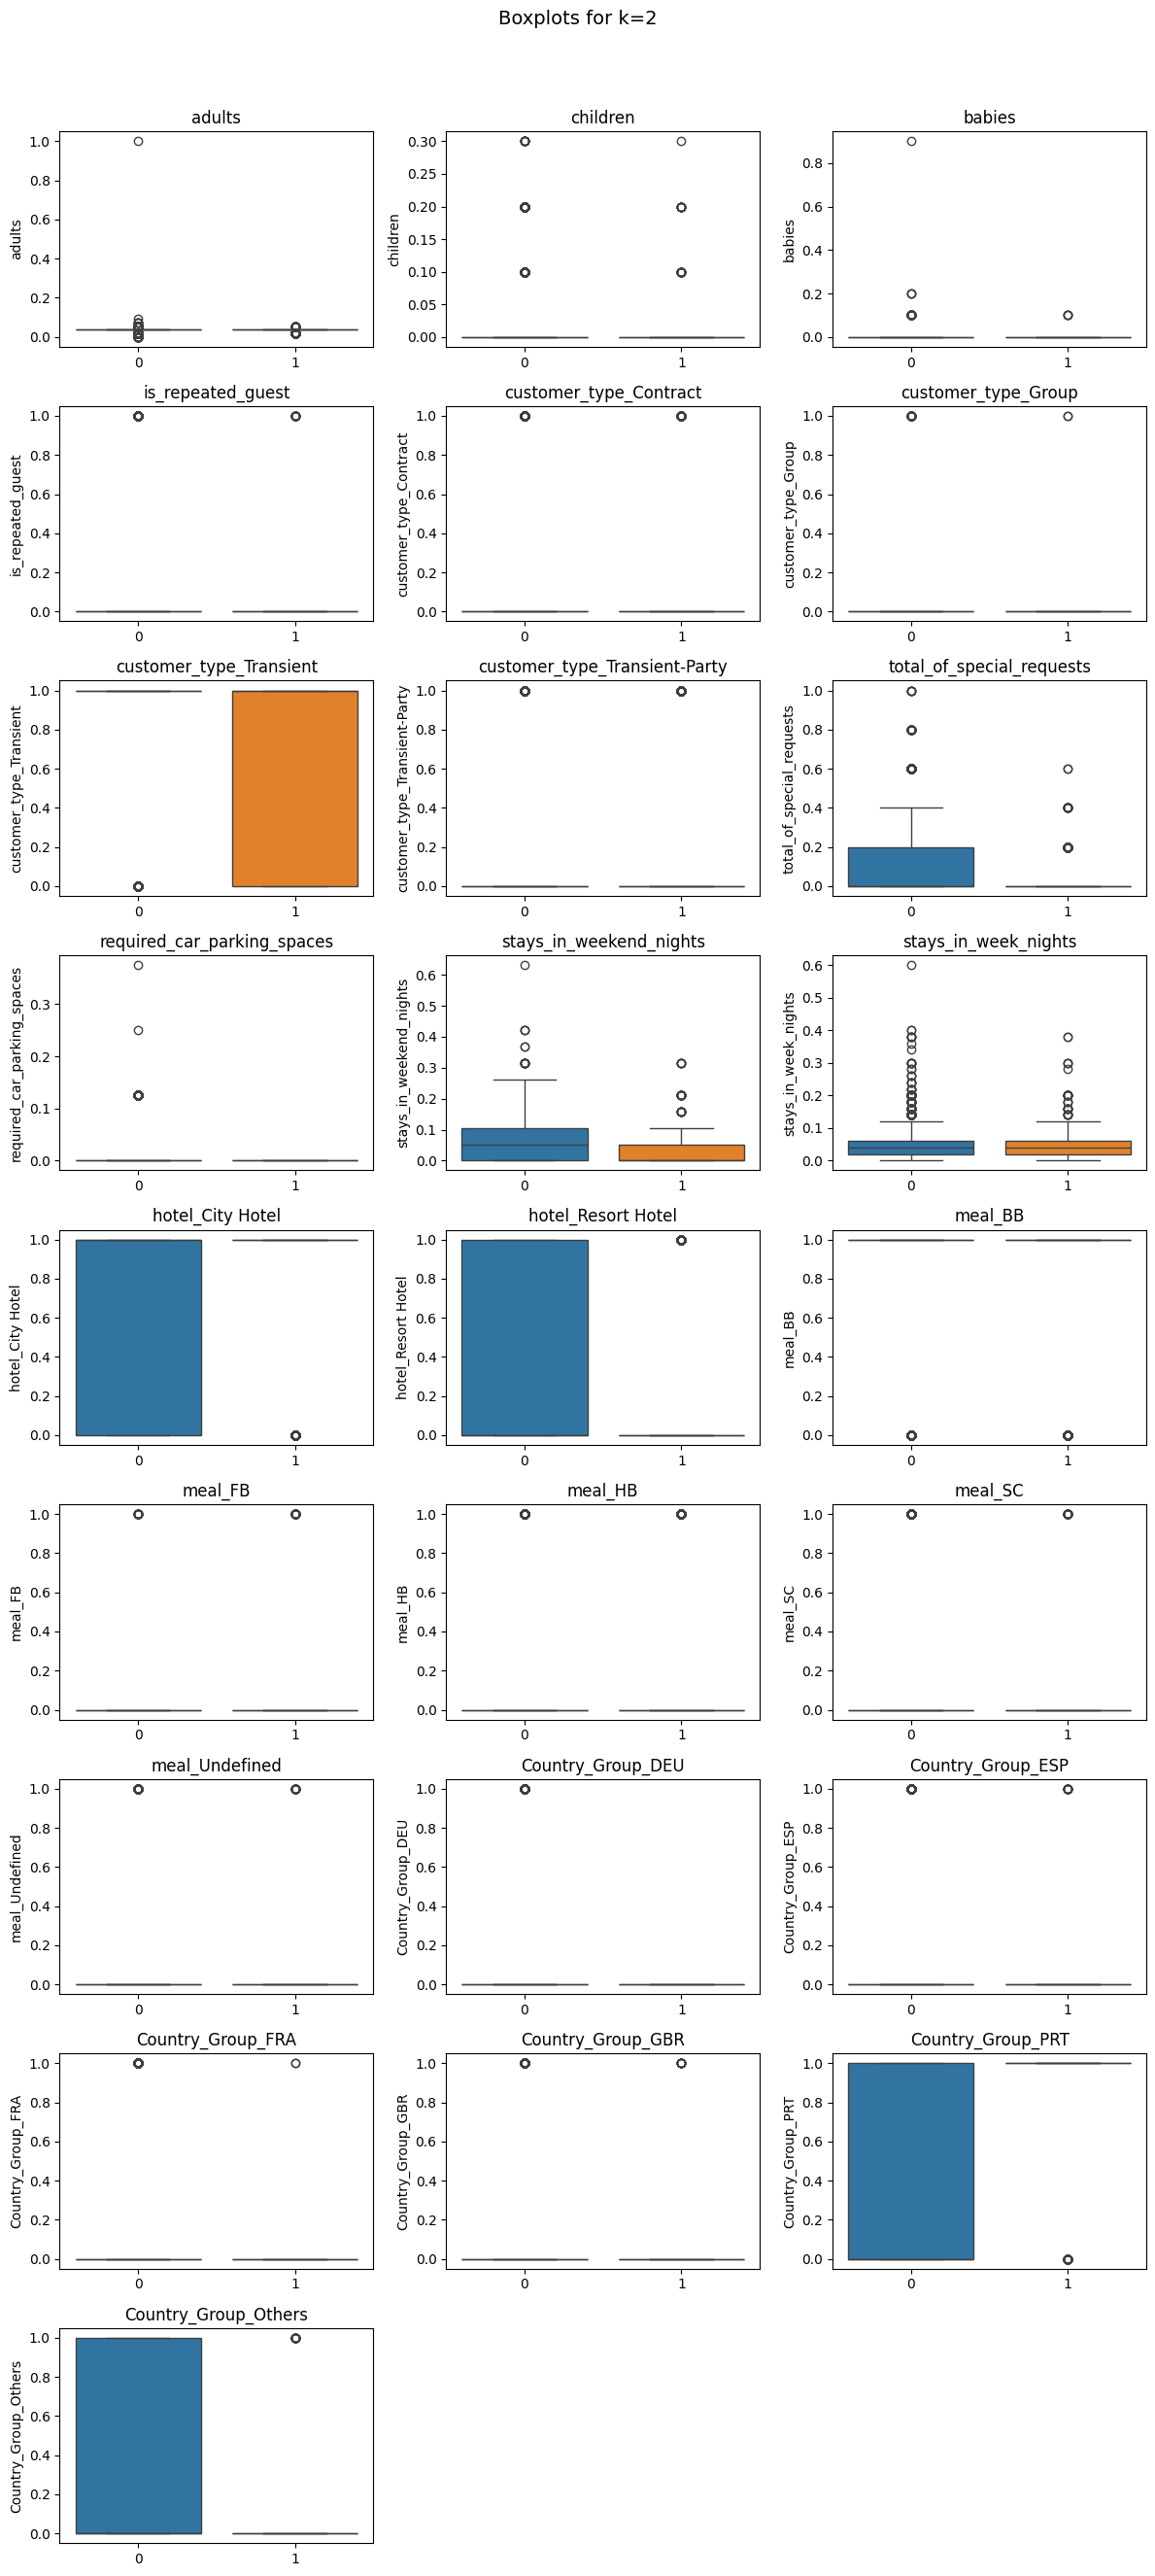

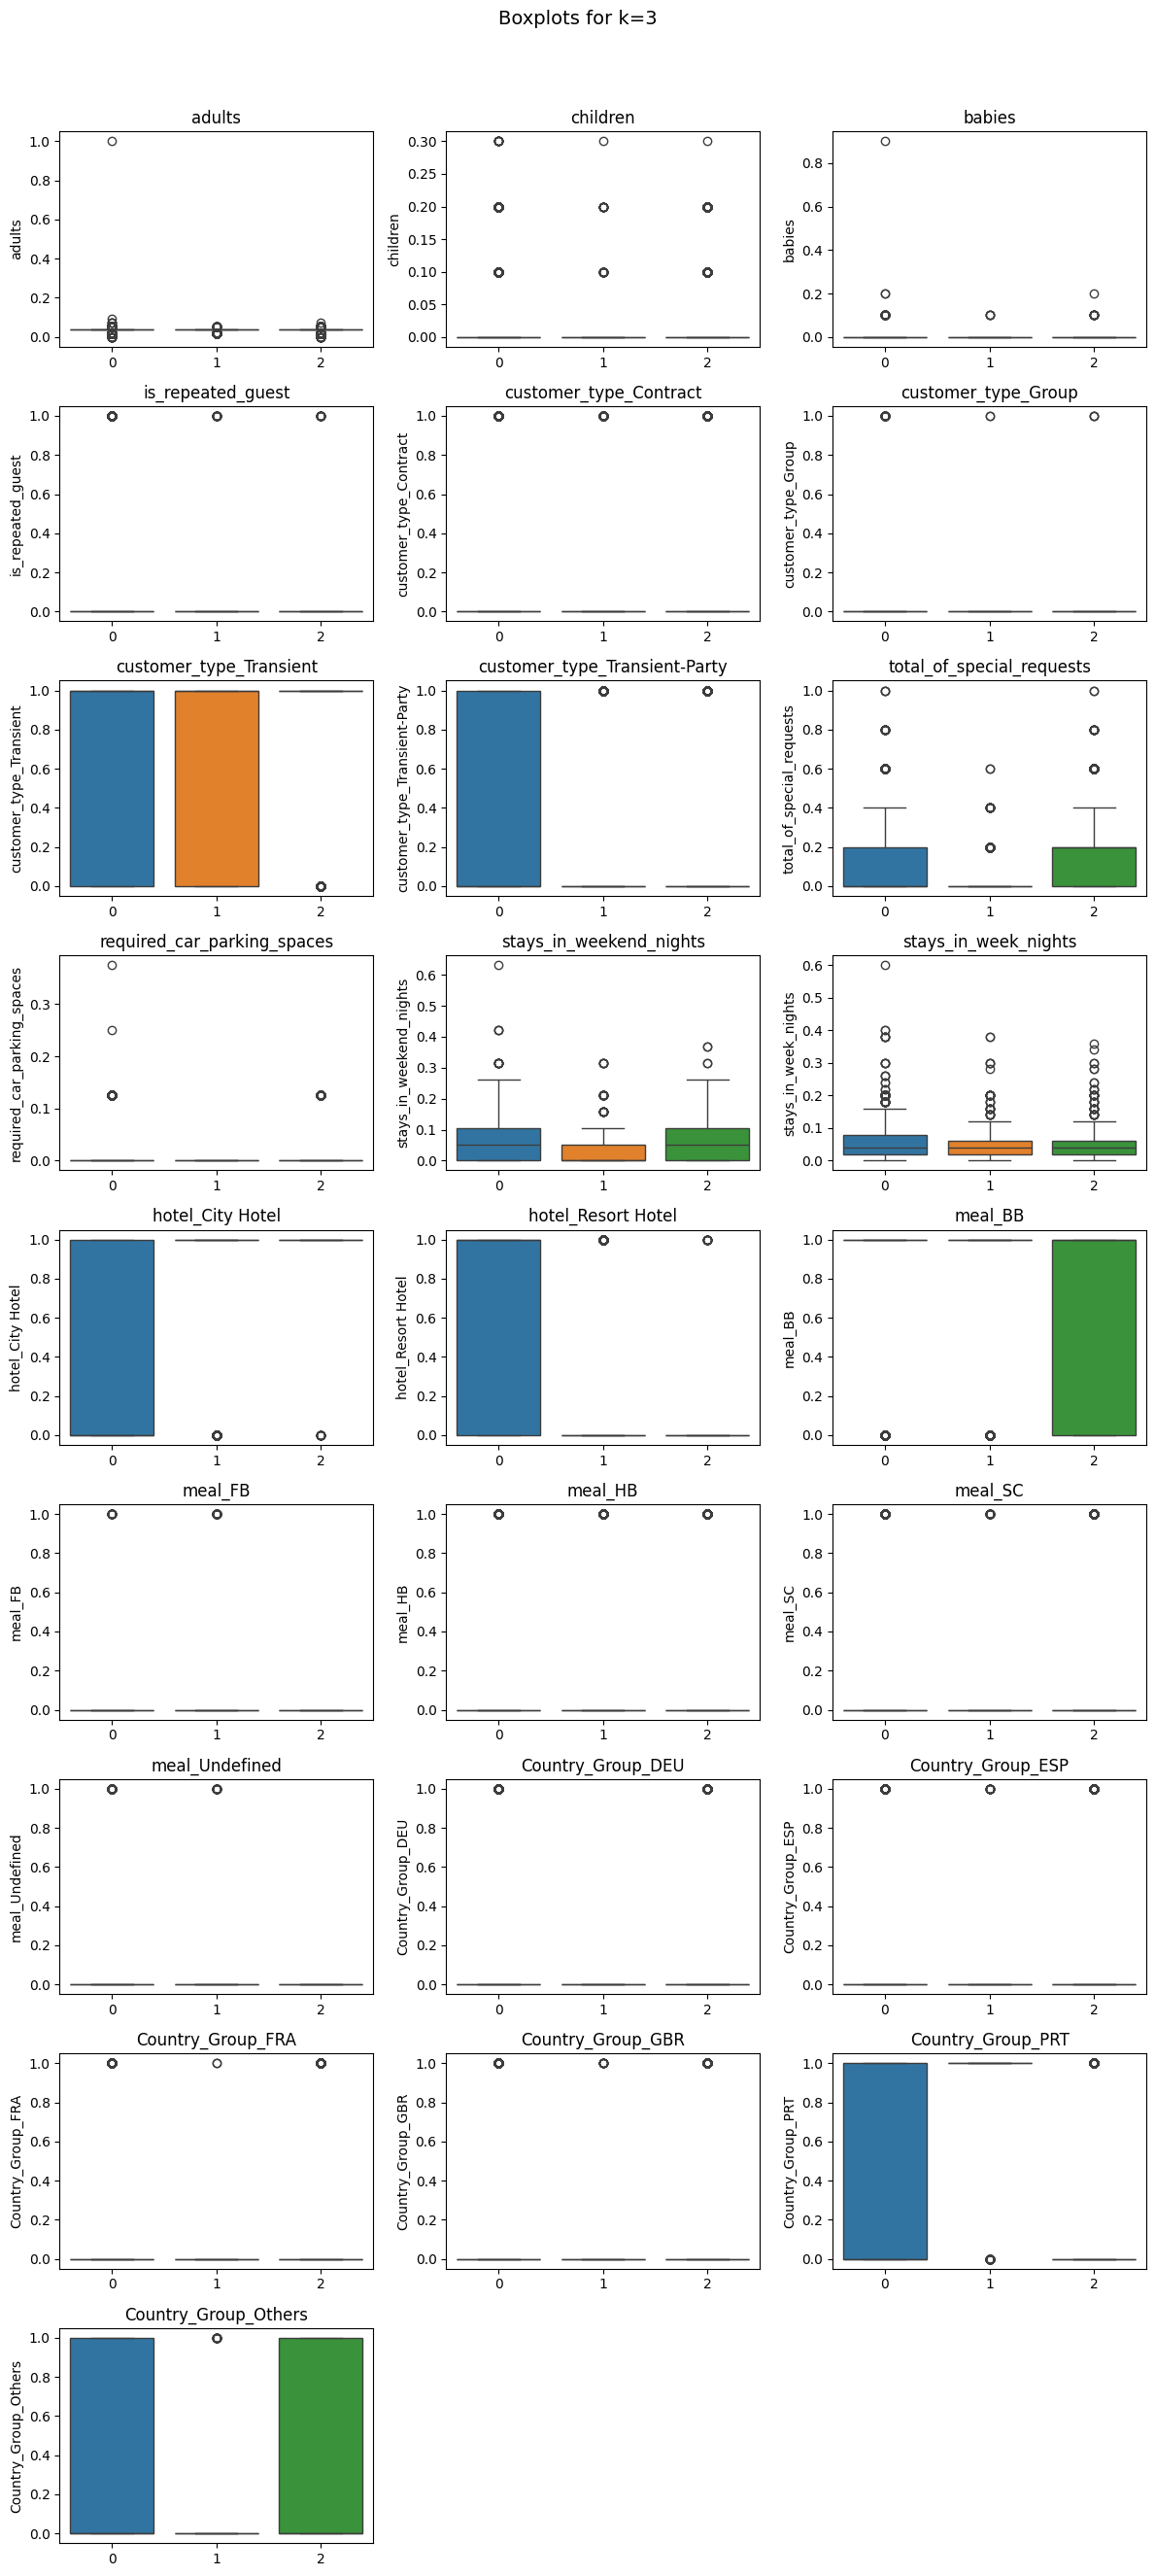

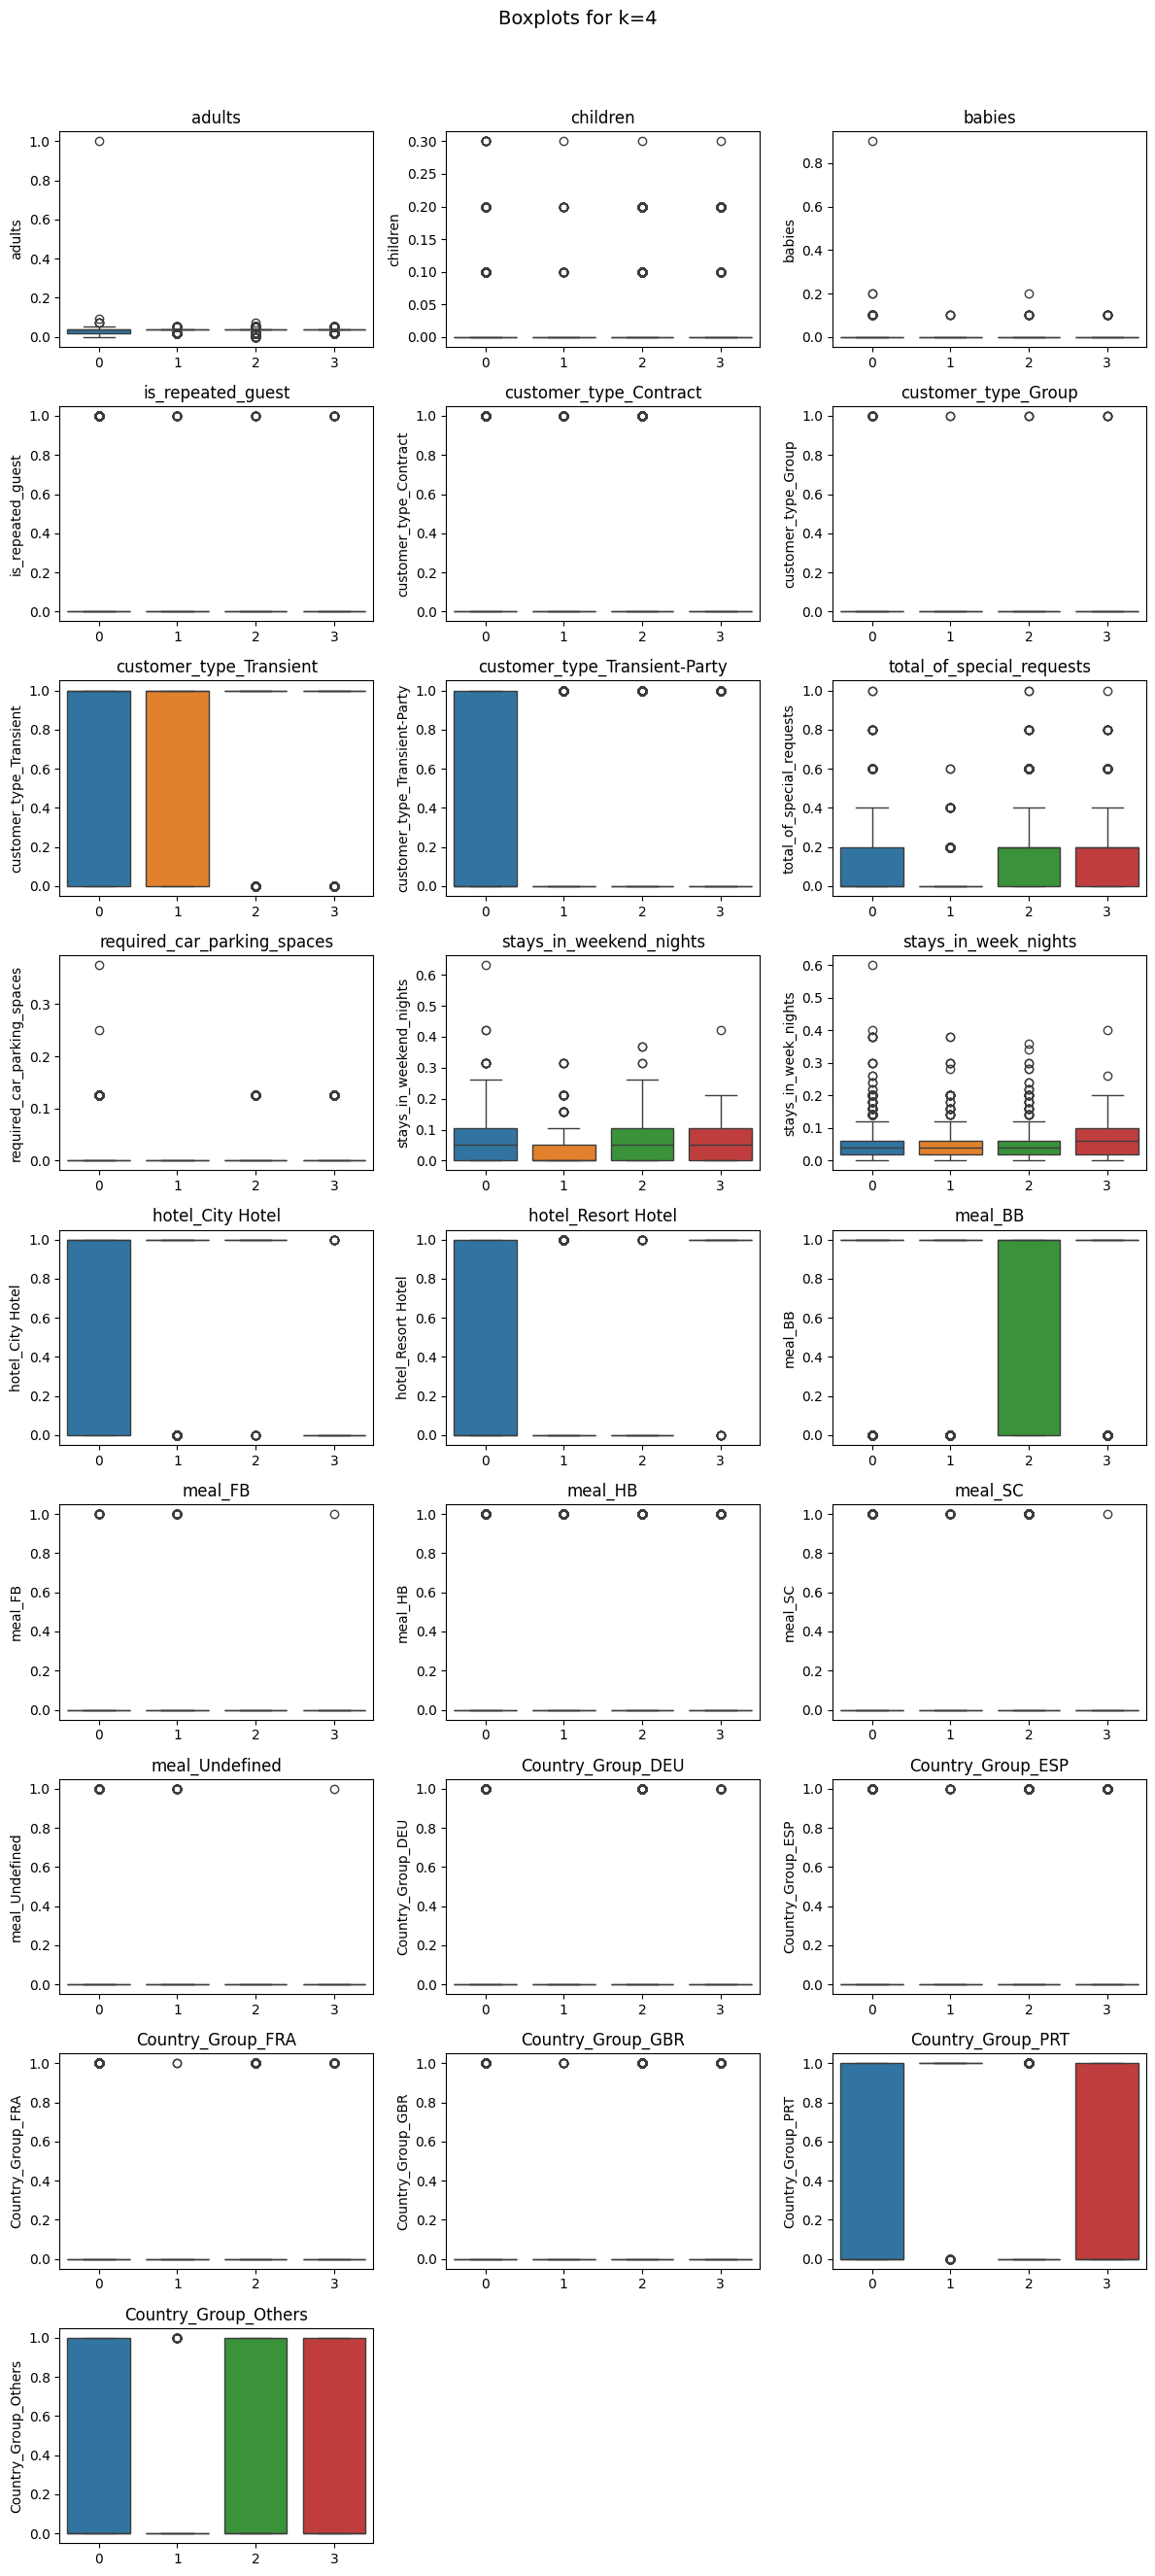

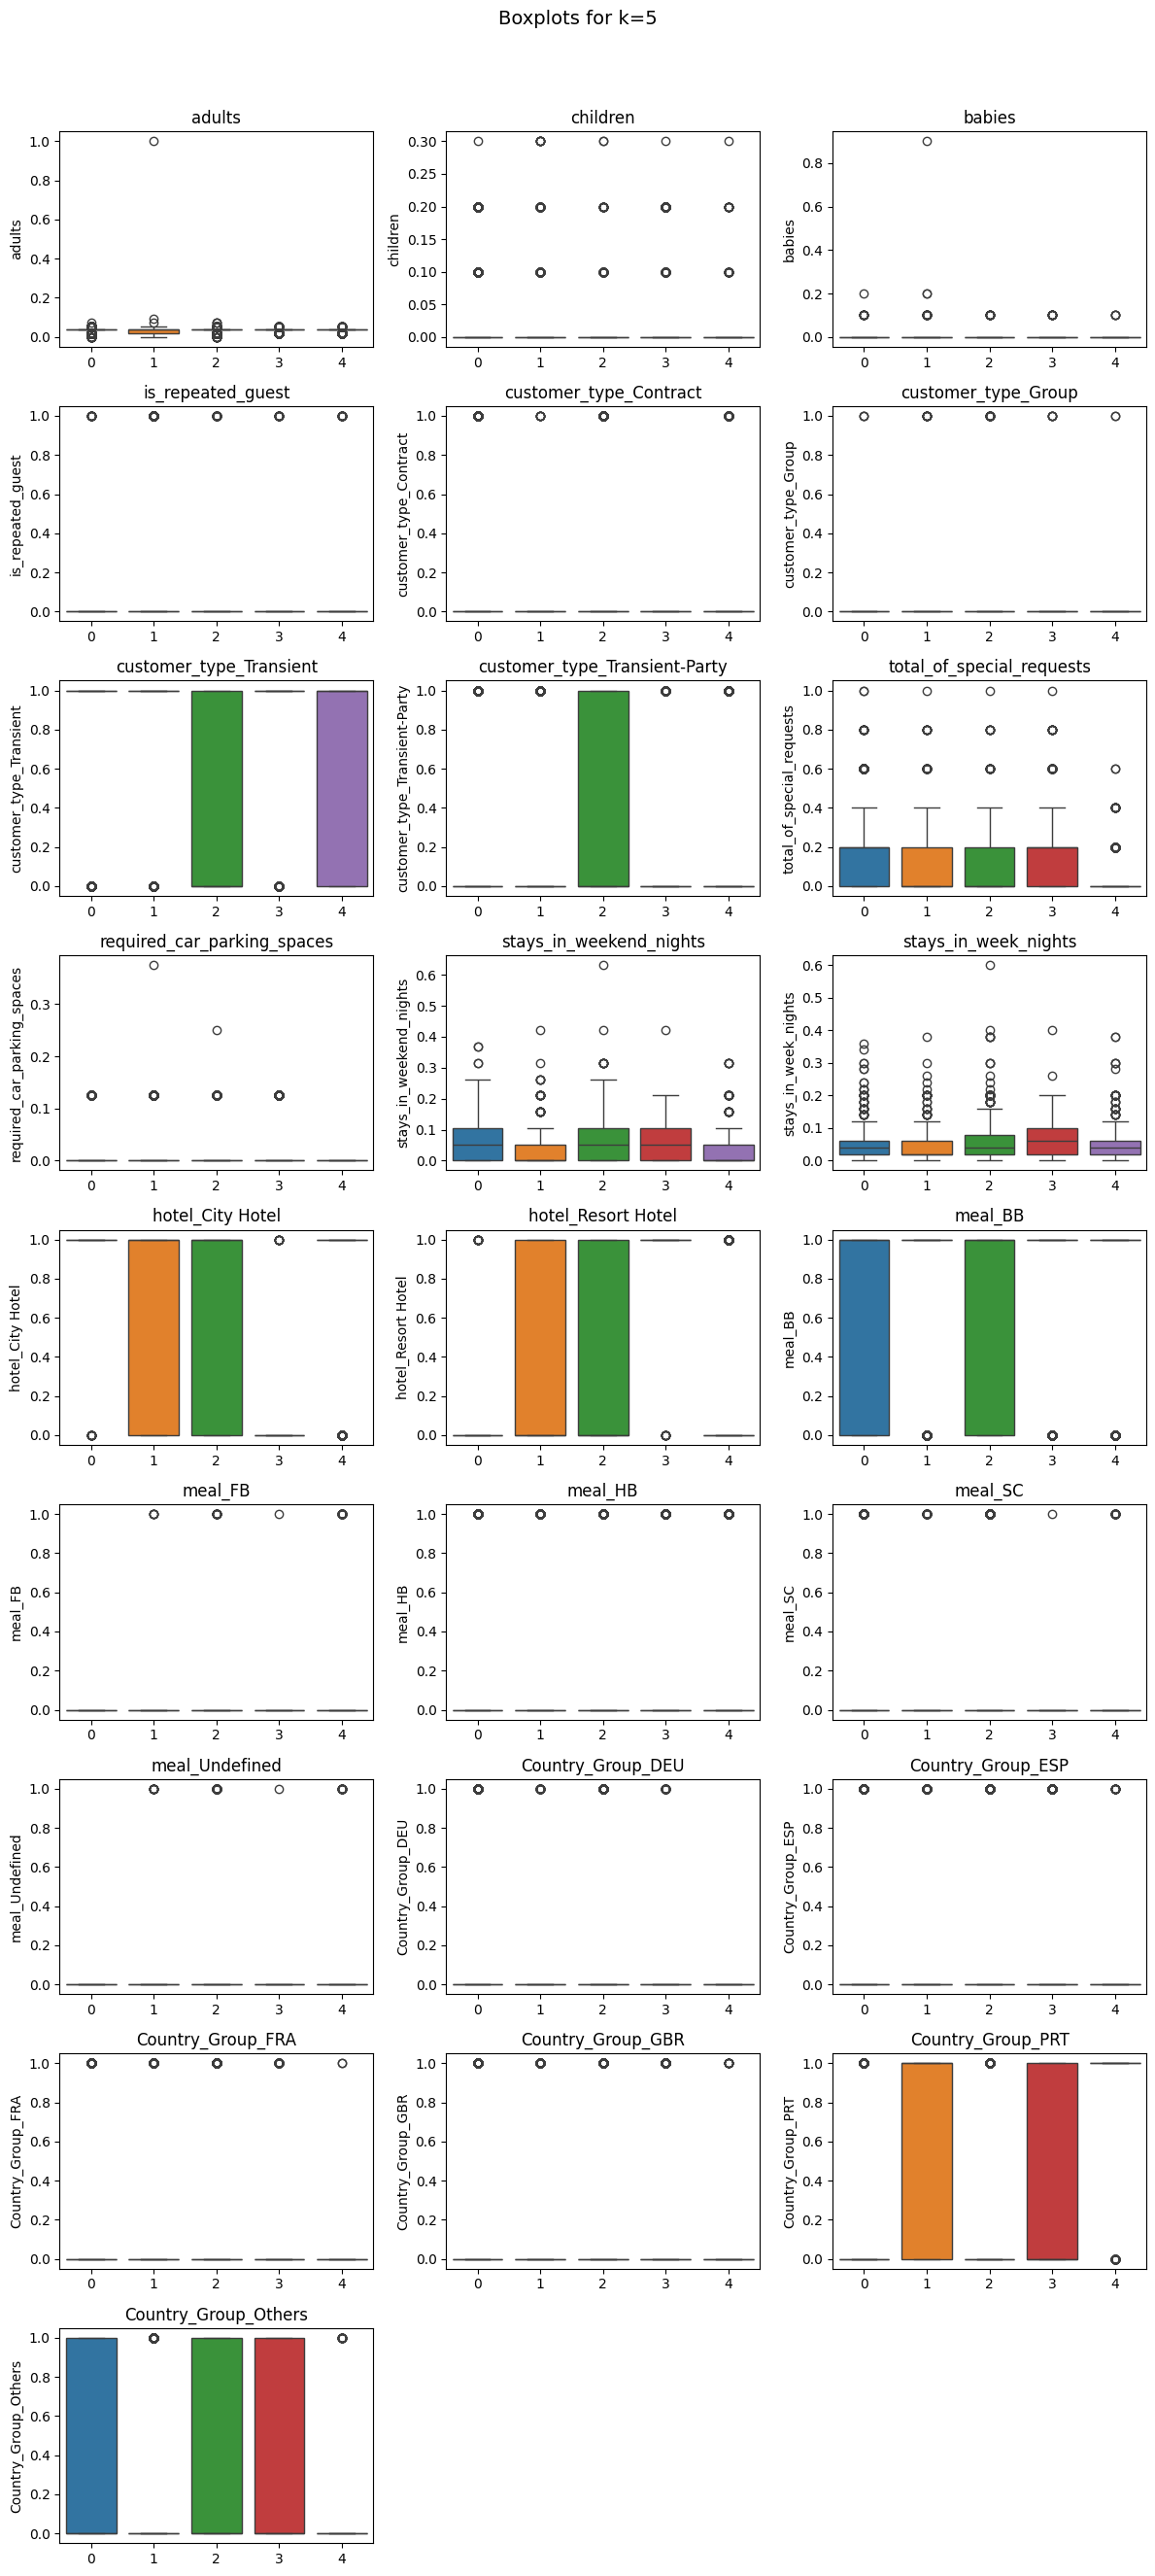

In [52]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    # Define the number of rows and columns in the grid (e.g., 3 rows, 3 columns)
    n_cols = 3  # Adjust the number of columns
    n_rows = len(selected_columns) // n_cols + (len(selected_columns) % n_cols > 0)

    # Define a color palette (e.g., using the 'Set2' palette)
    palette = sns.color_palette("tab10", n_colors=len(selected_columns))

    # Iterate through the clustering results
    for k, clusters in Hcluster_results.items():
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3))  # Adjust size for smaller graphs
        fig.suptitle(f"Boxplots for k={k}", fontsize=14)  # Smaller title font size
        
        # Flatten axes for easier iteration
        axes = axes.flatten()

        # Iterate through each selected feature and plot it
        for i, feature in enumerate(selected_columns):
            sns.boxplot(x=clusters, y=muestra[feature], ax=axes[i], palette=palette)
            axes[i].set_title(f"{feature}", fontsize=12)  # Smaller title font size for each subplot

        # Remove any empty subplots
        for j in range(i + 1, n_rows * n_cols):
            fig.delaxes(axes[j])

        plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the main title
        plt.show()


/var/folders/4l/3kt45bp907g_zjx6qwp8r7v00000gn/T/ipykernel_10663/2190466391.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.index, y=correlation.values, palette='coolwarm')


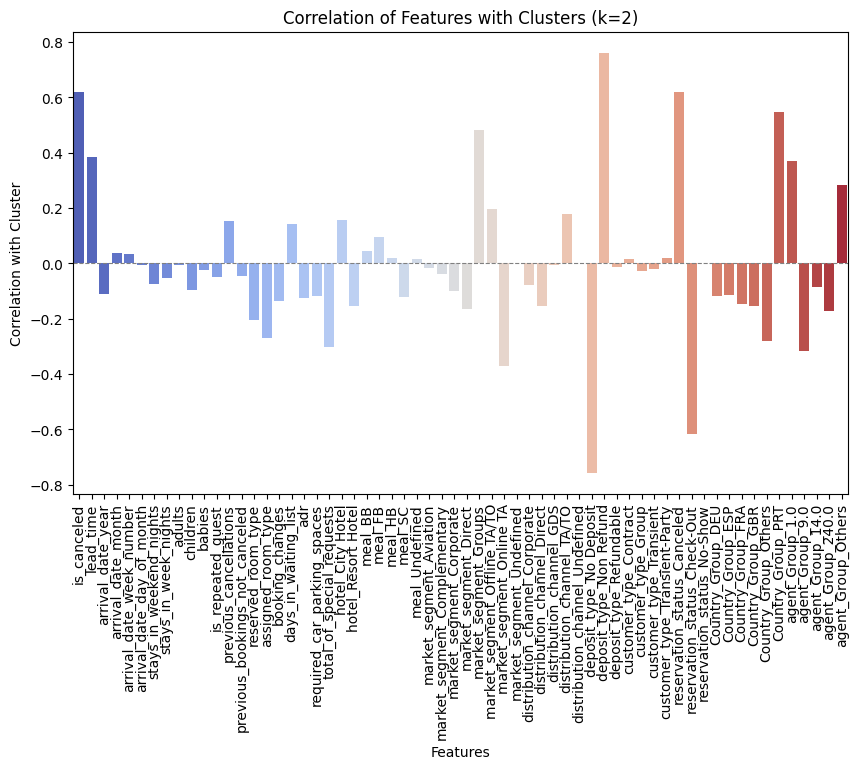

/var/folders/4l/3kt45bp907g_zjx6qwp8r7v00000gn/T/ipykernel_10663/2190466391.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.index, y=correlation.values, palette='coolwarm')


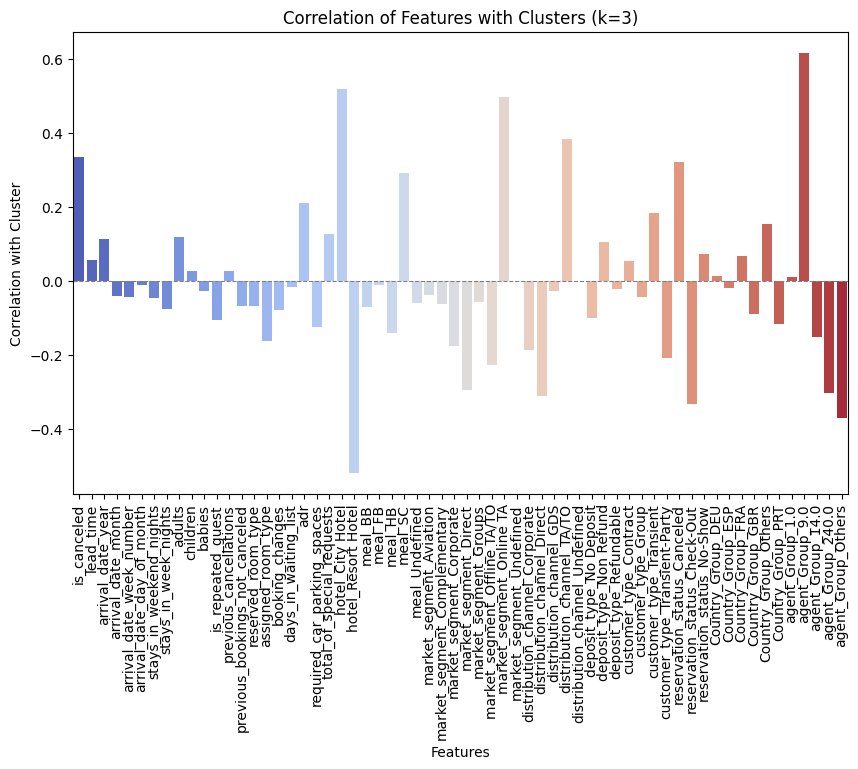

/var/folders/4l/3kt45bp907g_zjx6qwp8r7v00000gn/T/ipykernel_10663/2190466391.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.index, y=correlation.values, palette='coolwarm')


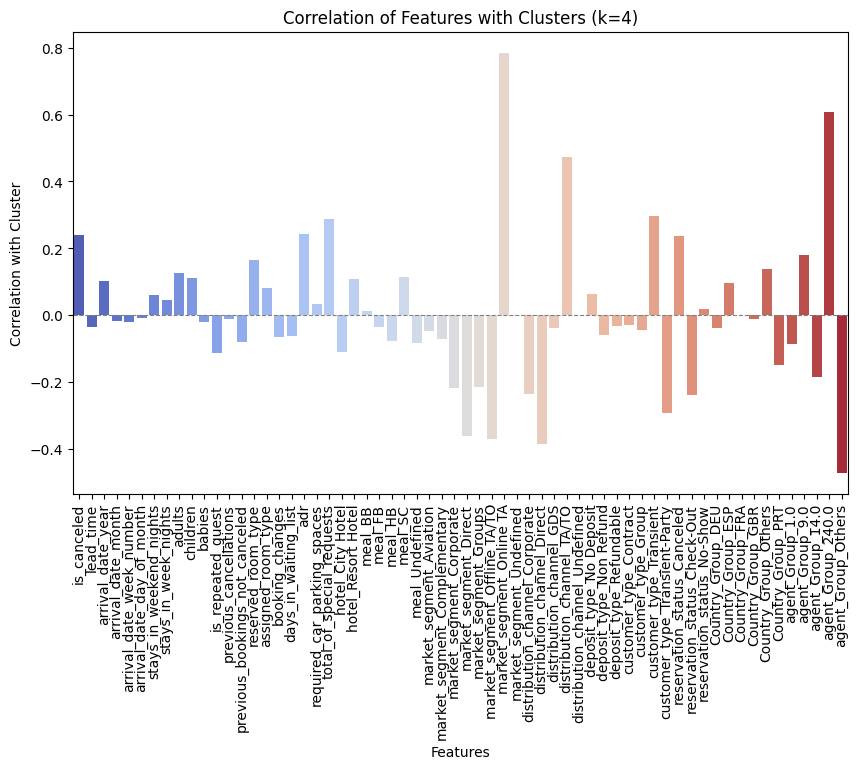

/var/folders/4l/3kt45bp907g_zjx6qwp8r7v00000gn/T/ipykernel_10663/2190466391.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.index, y=correlation.values, palette='coolwarm')


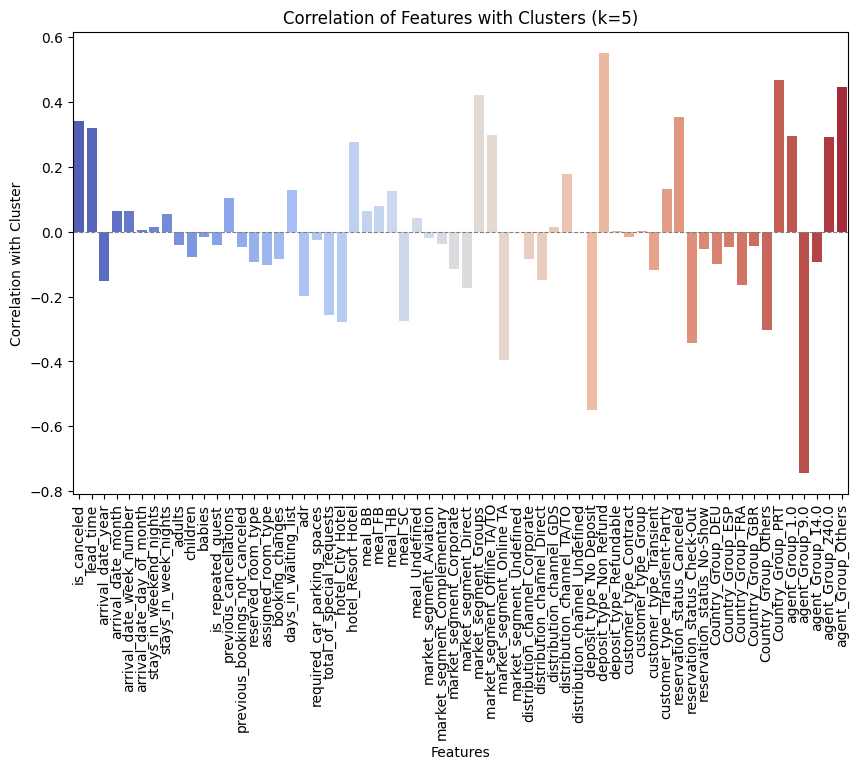

Correlation results for k=2:
deposit_type_Non Refund           0.761973
reservation_status_Canceled       0.621315
is_canceled                       0.618543
Country_Group_PRT                 0.548766
market_segment_Groups             0.481732
                                    ...   
market_segment_Online TA         -0.369726
reservation_status_Check-Out     -0.618543
deposit_type_No Deposit          -0.756271
market_segment_Undefined               NaN
distribution_channel_Undefined         NaN
Name: Cluster, Length: 62, dtype: float64

Correlation results for k=3:
agent_Group_9.0                   0.616516
hotel_City Hotel                  0.518789
market_segment_Online TA          0.495649
distribution_channel_TA/TO        0.381735
is_canceled                       0.333505
                                    ...   
reservation_status_Check-Out     -0.333505
agent_Group_Others               -0.371750
hotel_Resort Hotel               -0.518789
market_segment_Undefined               

In [53]:


# Assuming 'sampled_df' is your DataFrame with features and 'cluster_results' is your dictionary with clusters
correlation_results = {}

# Iterate through each cluster assignment for different k values
for k, clusters in Hcluster_results.items():
    # Convert cluster labels to a DataFrame
    encoded_clusters = pd.Series(clusters, name='Cluster')
    
    # Combine features with cluster labels
    data = pd.concat([muestra.reset_index(drop=True), encoded_clusters.reset_index(drop=True)], axis=1)
    
    # Calculate correlation with the cluster
    correlation = data.corr()['Cluster'].drop('Cluster')
    
    # Store the correlation results
    correlation_results[k] = correlation

    # Visualization for the current k
    plt.figure(figsize=(10, 6))
    sns.barplot(x=correlation.index, y=correlation.values, palette='coolwarm')
    plt.title(f'Correlation of Features with Clusters (k={k})')
    plt.xlabel('Features')
    plt.ylabel('Correlation with Cluster')
    plt.xticks(rotation=90)
    plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')
    plt.show()

# Optionally, you can print the correlation results for each k
for k, corr in correlation_results.items():
    print(f"Correlation results for k={k}:\n{corr.sort_values(ascending=False)}\n")


# Perfiles

A partir de los gráficos generados anteriormente, se generaron los siguientes perfiles de usuario

## Perfil 0: Huésped de corta estancia
Son principalmente adultos, sin niños o bebés. Son clientes del tipo "Transient".

Características:
- Estancias cortas, principalmente entre semana
- Pocas solicitudes especiales
- No suele requerir espacio de estacionamiento
- No es un huésped repetido

## Perfil 1: Viajero de negocios
Son adultos sin niños. Tienen una alta proporción de cliente tipo "Contract".

Características:
- Estancias cortas a medias, principalmente entre semana
- Algunas solicitudes especiales
- Puede requerir espacio de estacionamiento
- Probabilidad moderada de ser un huésped repetido

## Perfil 2: Familia de vacaciones
Mezcla de adultos, niños y ocasionalmente bebés. Suelen ser clientes del tipo "transient" o "group".

Características:
- Estancias de duración media, principalmente en fines de semana
- Número moderado de solicitudes especiales
- Mayor probabilidad de requerir espacio de estacionamiento
- Algunas estancias repetidas

## Perfil 3: Grupo grande o evento
Mezcla de adultos y niños, son clientes con una alta proporción de "Transient-Party".

Características:
- Estancias de duración media, con énfasis en fines de semana
- Bajo número de solicitudes especiales
- Alta probabilidad de requerir espacios de estacionamiento
- Puede incluir huéspedes repetidos

## Perfil 4: Huésped de larga estancia
Principalmente adultos con algunos niños. Son un tipo de cliente mixto entre "Transient" y "Contract".

Características:
- Estancias más largas, distribuidas tanto entre semana como en fines de semana
- Pocas solicitudes especiales
- Alta probabilidad de requerir espacio de estacionamiento
- Mayor probabilidad de ser huésped repetido


# Estrategias de marketing

## Perfil 0: Huésped de corta estancia
- Cómo: Ofrecer promociones enfocadas en estancias cortas y entre semana, con descuentos en reservas directas. Implementar campañas de email marketing dirigidas a captar nuevos huéspedes con ofertas flash y beneficios adicionales como descuentos en restaurantes cercanos.
- Por qué: Estos huéspedes no suelen quedarse mucho tiempo ni repetir su estancia, por lo que el objetivo es maximizar la ocupación en días menos demandados (entre semana) y atraerlos con precios competitivos y facilidad en la reserva.
- Qué: Campañas que resalten la conveniencia de una estancia rápida y sin complicaciones, enfatizando la velocidad en el check-in/check-out y ofertas que incluyan servicios básicos sin solicitudes adicionales.

## Perfil 1: Viajero de negocios
- Cómo: Ofrecer tarifas corporativas, programas de fidelización, y convenios con empresas locales. Crear paquetes de "viaje de negocios" que incluyan beneficios como Wi-Fi premium, desayuno rápido, y acceso a salas de reuniones o estaciones de trabajo.
- Por qué: Los viajeros de negocios tienden a ser huéspedes repetidos y necesitan servicios que faciliten su rutina laboral. Proveer ventajas competitivas y comodidades adicionales puede asegurar su preferencia por el hotel.
- Qué: Enfocar campañas en destacar la rapidez y eficiencia de los servicios, resaltando las tarifas corporativas, la proximidad al centro de negocios y los servicios que ayudan a mejorar la productividad (como el early check-in y el late check-out).

## Perfil 2: Familia de Vacaciones
- Cómo: Promocionar paquetes familiares que incluyan descuentos por estancias de fin de semana y beneficios adicionales como desayuno gratuito para niños, acceso a actividades recreativas, o entradas a parques temáticos cercanos.
- Por qué: Las familias buscan comodidad y entretenimiento durante su estancia. Ofrecer un valor agregado en servicios familiares, así como precios competitivos durante los fines de semana, atraerá a este perfil.
- Qué: Campañas que destaquen la hospitalidad familiar, con ofertas centradas en el entretenimiento para niños, descuentos para familias numerosas, y servicios que faciliten su estancia (por ejemplo, habitaciones conectadas o estacionamiento gratuito).

## Perfil 3: Grupo Grande o Evento
- Cómo: Crear paquetes grupales con precios reducidos para estancias largas, así como la posibilidad de personalizar eventos o celebraciones en el hotel. Ofrecer descuentos especiales para reservas de múltiples habitaciones y servicios como transporte o catering.
- Por qué: Los grupos grandes y eventos requieren soluciones específicas, como múltiples habitaciones, servicios personalizados y estacionamiento. Un enfoque en estos puntos ayudará a captar y retener este perfil.
- Qué: Promover paquetes de eventos que incluyan organización de fiestas, bodas o convenciones, con beneficios como descuentos en reservas grandes, disponibilidad de salas para eventos, y servicios de catering.

## Perfil 4: Huésped de Larga Estancia
- Cómo: Ofrecer tarifas especiales para estancias prolongadas con beneficios como lavandería gratuita, descuentos en el uso de servicios del hotel, y programas de fidelización. Proporcionar acceso a servicios de bienestar, como gimnasio o spa, para hacer su estancia más cómoda.
- Por qué: Los huéspedes de larga estancia buscan comodidad y valor en su estadía. Incentivarlos con descuentos para estancias extendidas y comodidades adicionales les dará razones para elegir este hotel en lugar de otros.
- Qué: Crear campañas que resalten la sensación de "hogar lejos de casa", enfocándose en tarifas especiales para largas estancias, promociones para servicios adicionales (como comidas o limpieza), y programas de recompensas para huéspedes frecuentes.